#  Melt Rate as a function of Depth

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'


# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)

def get_labels(expt):
    '''
    Get labels of experiments
    Make some modifications to names
    '''
    labels = []
    for fileIndex in range(len(expt)):
        fileName = expt[fileIndex]
        baseName = os.path.basename(basedrive +fileName)
        modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
        if "COM" in fileName:
            #make edits to COM names
            if "MOM6" in fileName:
                if "SIGMA_ZSTAR" not in fileName:
                    modelName = modelName + '-LAYER'
            elif "ROMS" in fileName:
                modelName = "ROMS"
        elif "TYP" in fileName:
            # make edits to COM names
            if "MOM6" in fileName:
                modelName = modelName + '-LAYER'
            elif "CNRS" in fileName:
                if "TYPa" in fileName:
                    modelName = modelName + '-TYPa'
                elif "TYPb" in fileName:
                    modelName = modelName + '-TYPb'
            elif "tides" in fileName:
                modelName = "ROMS-tides"
            elif "ROMS" in fileName:
                modelName = "ROMS"
        labels.append(modelName.strip('V3').replace(" ", "-"))
    return labels


In [3]:
sPerYr = 365.*24.*60.*60.


In [4]:
#12 model colours for 12 models, generated using https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
modelcolours=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Melt rate (Gt/yr) in each depth bin')

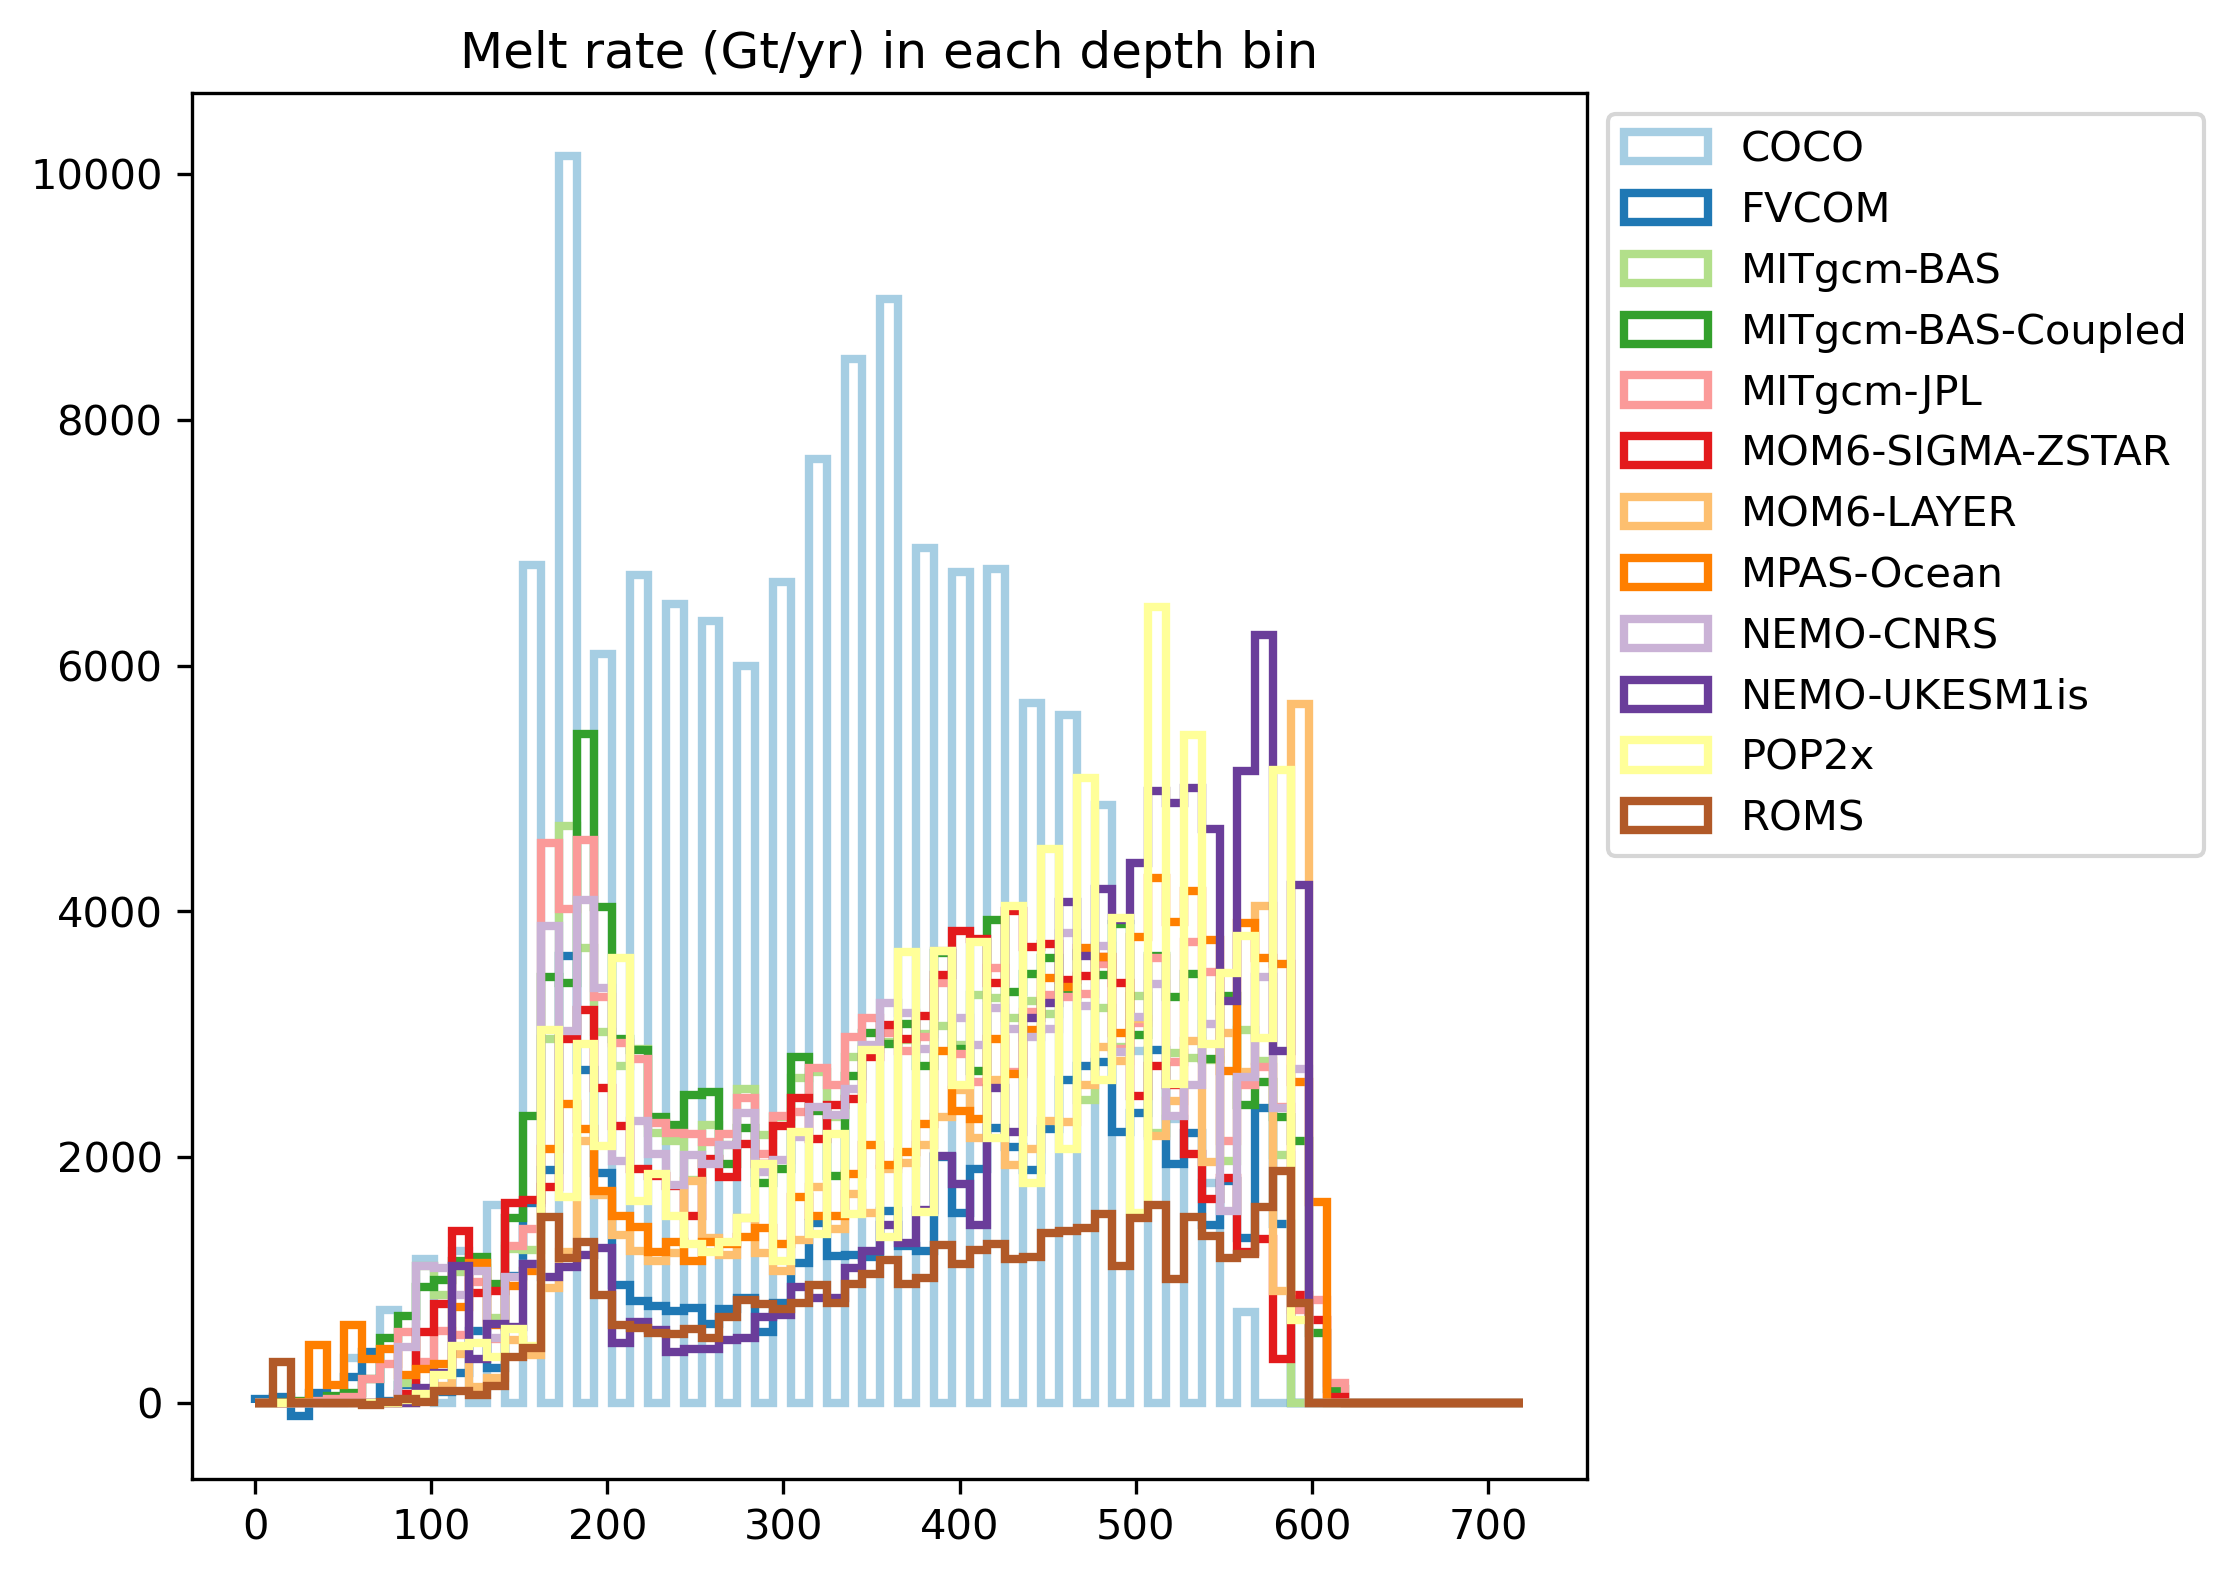

In [21]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,72)

for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)

    plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(mr.fillna(0)*2000*2000*1000/1e9), 
             label = labels[i],color = modelcolours[i],
            histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Melt rate (Gt/yr) in each depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Melt rate (Gt/yr) in each depth bin')

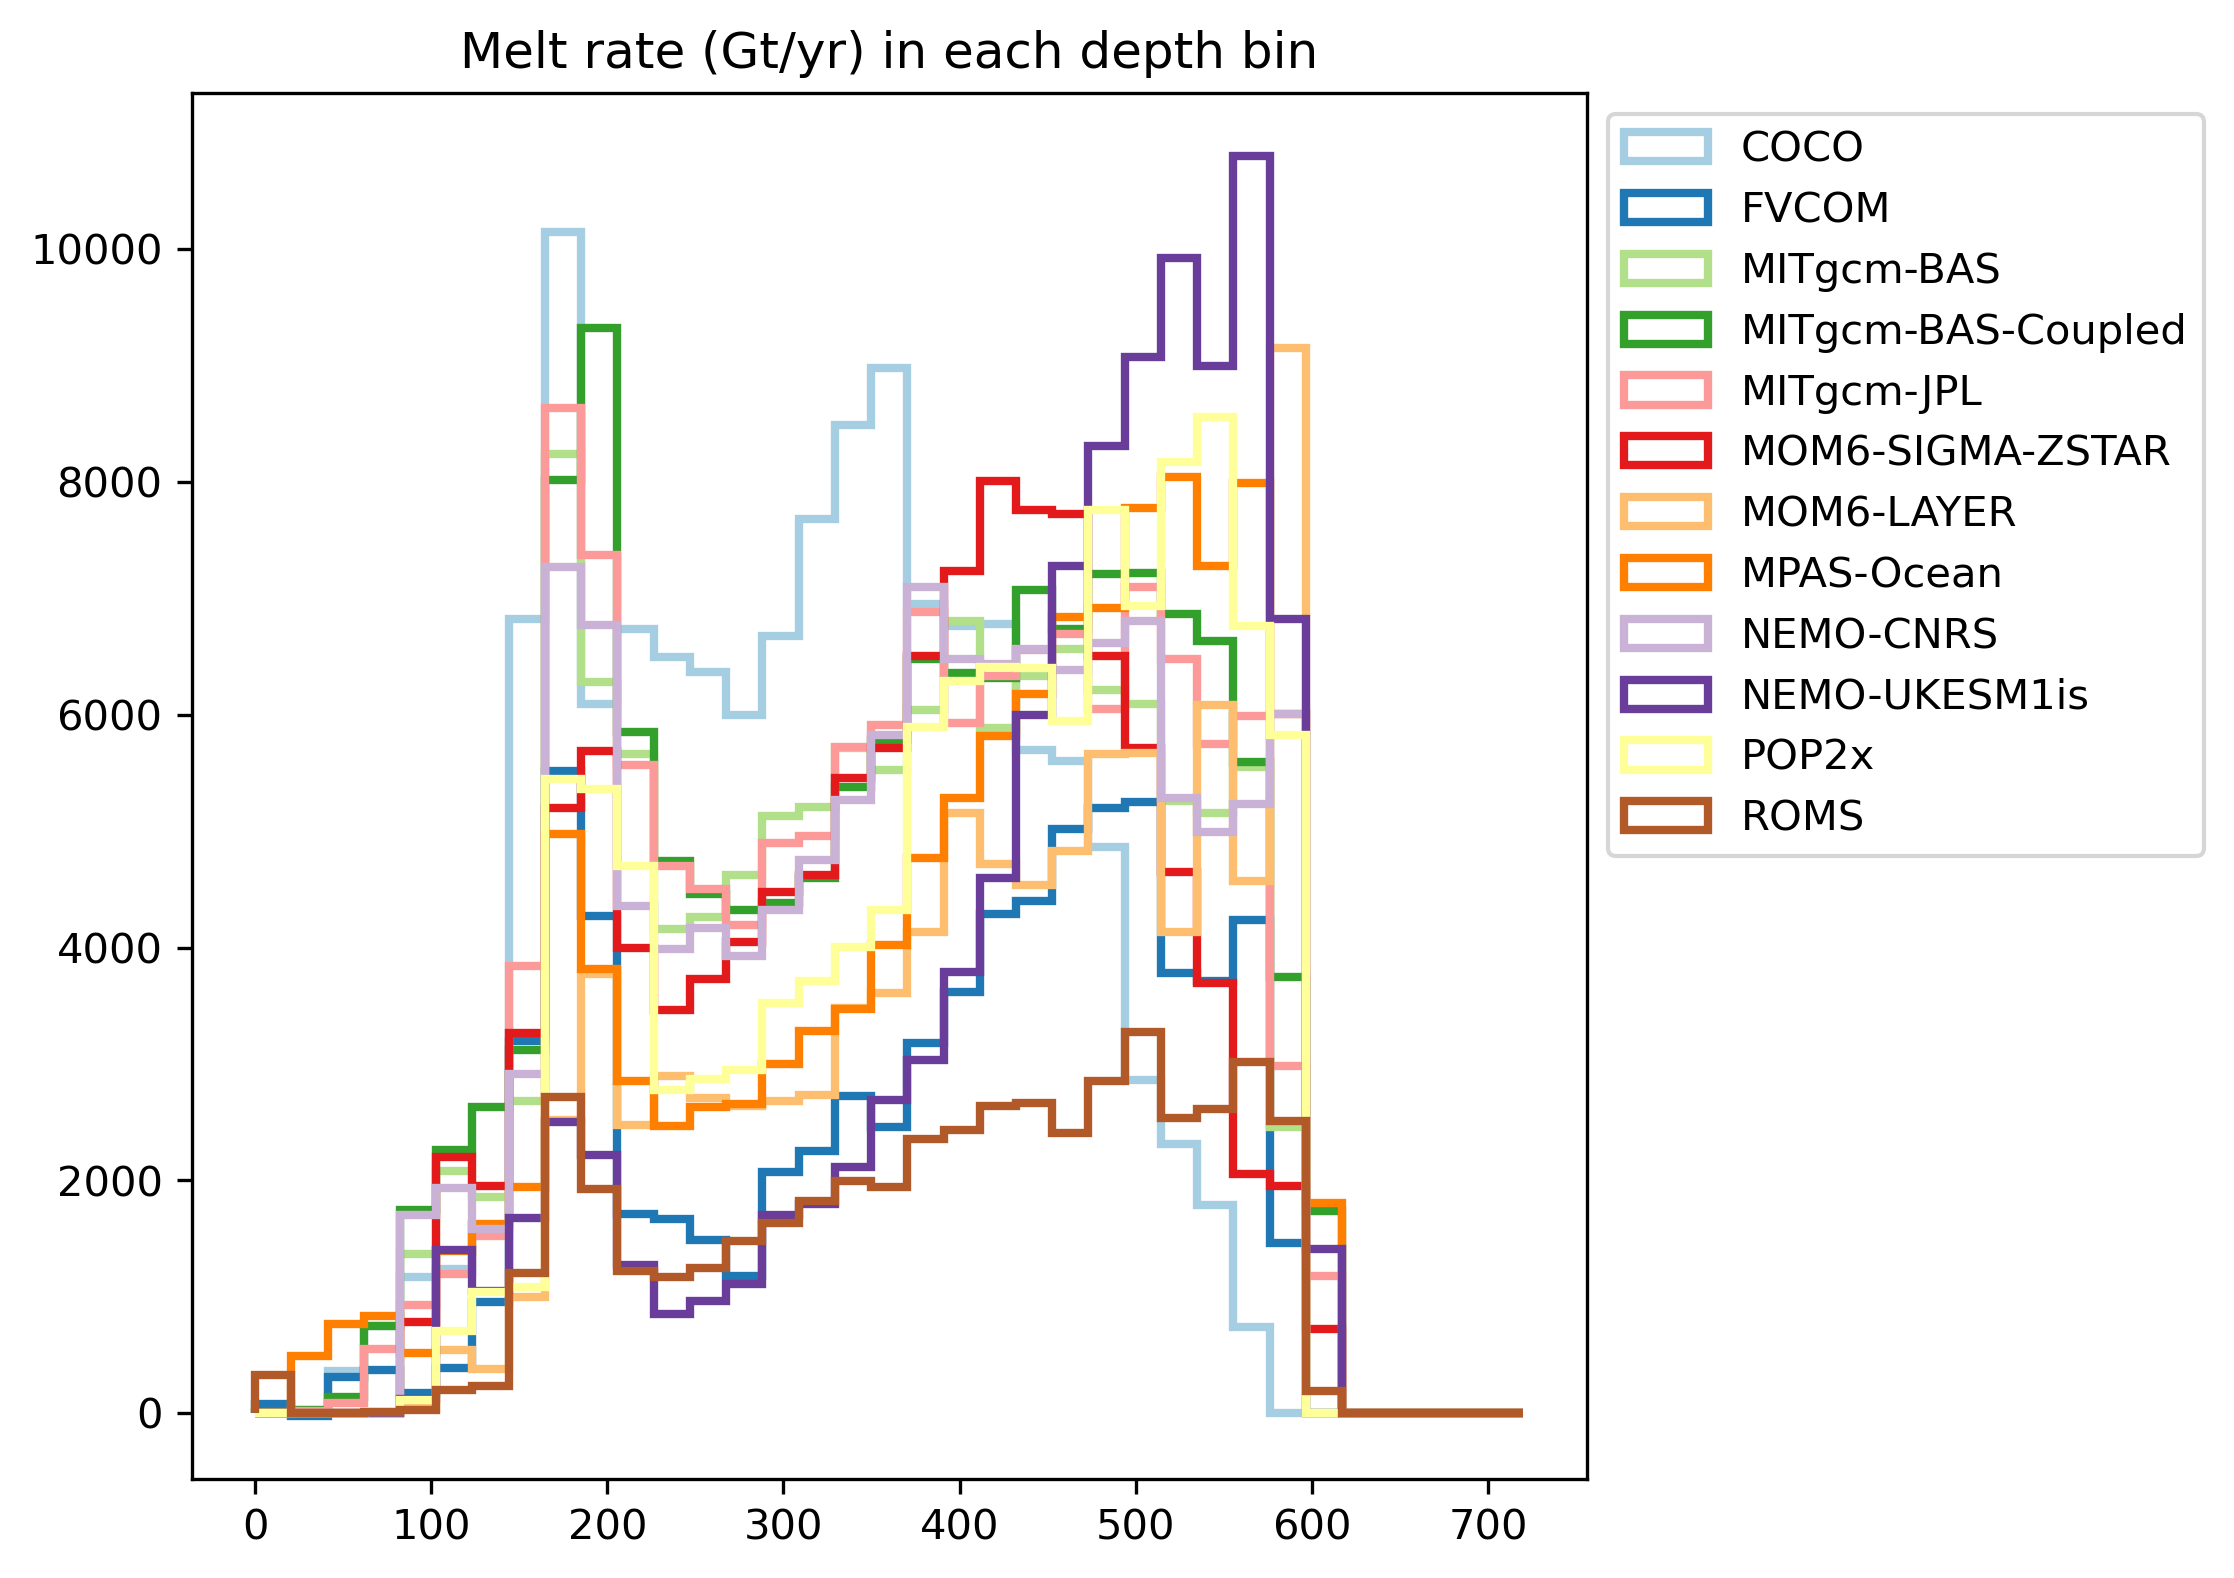

In [22]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,36)

for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)

    plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(mr.fillna(0)*2000*2000*1000/1e9), 
             label = labels[i],color = modelcolours[i],
            histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Melt rate (Gt/yr) in each depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Area (km$^2$) in each depth bin')

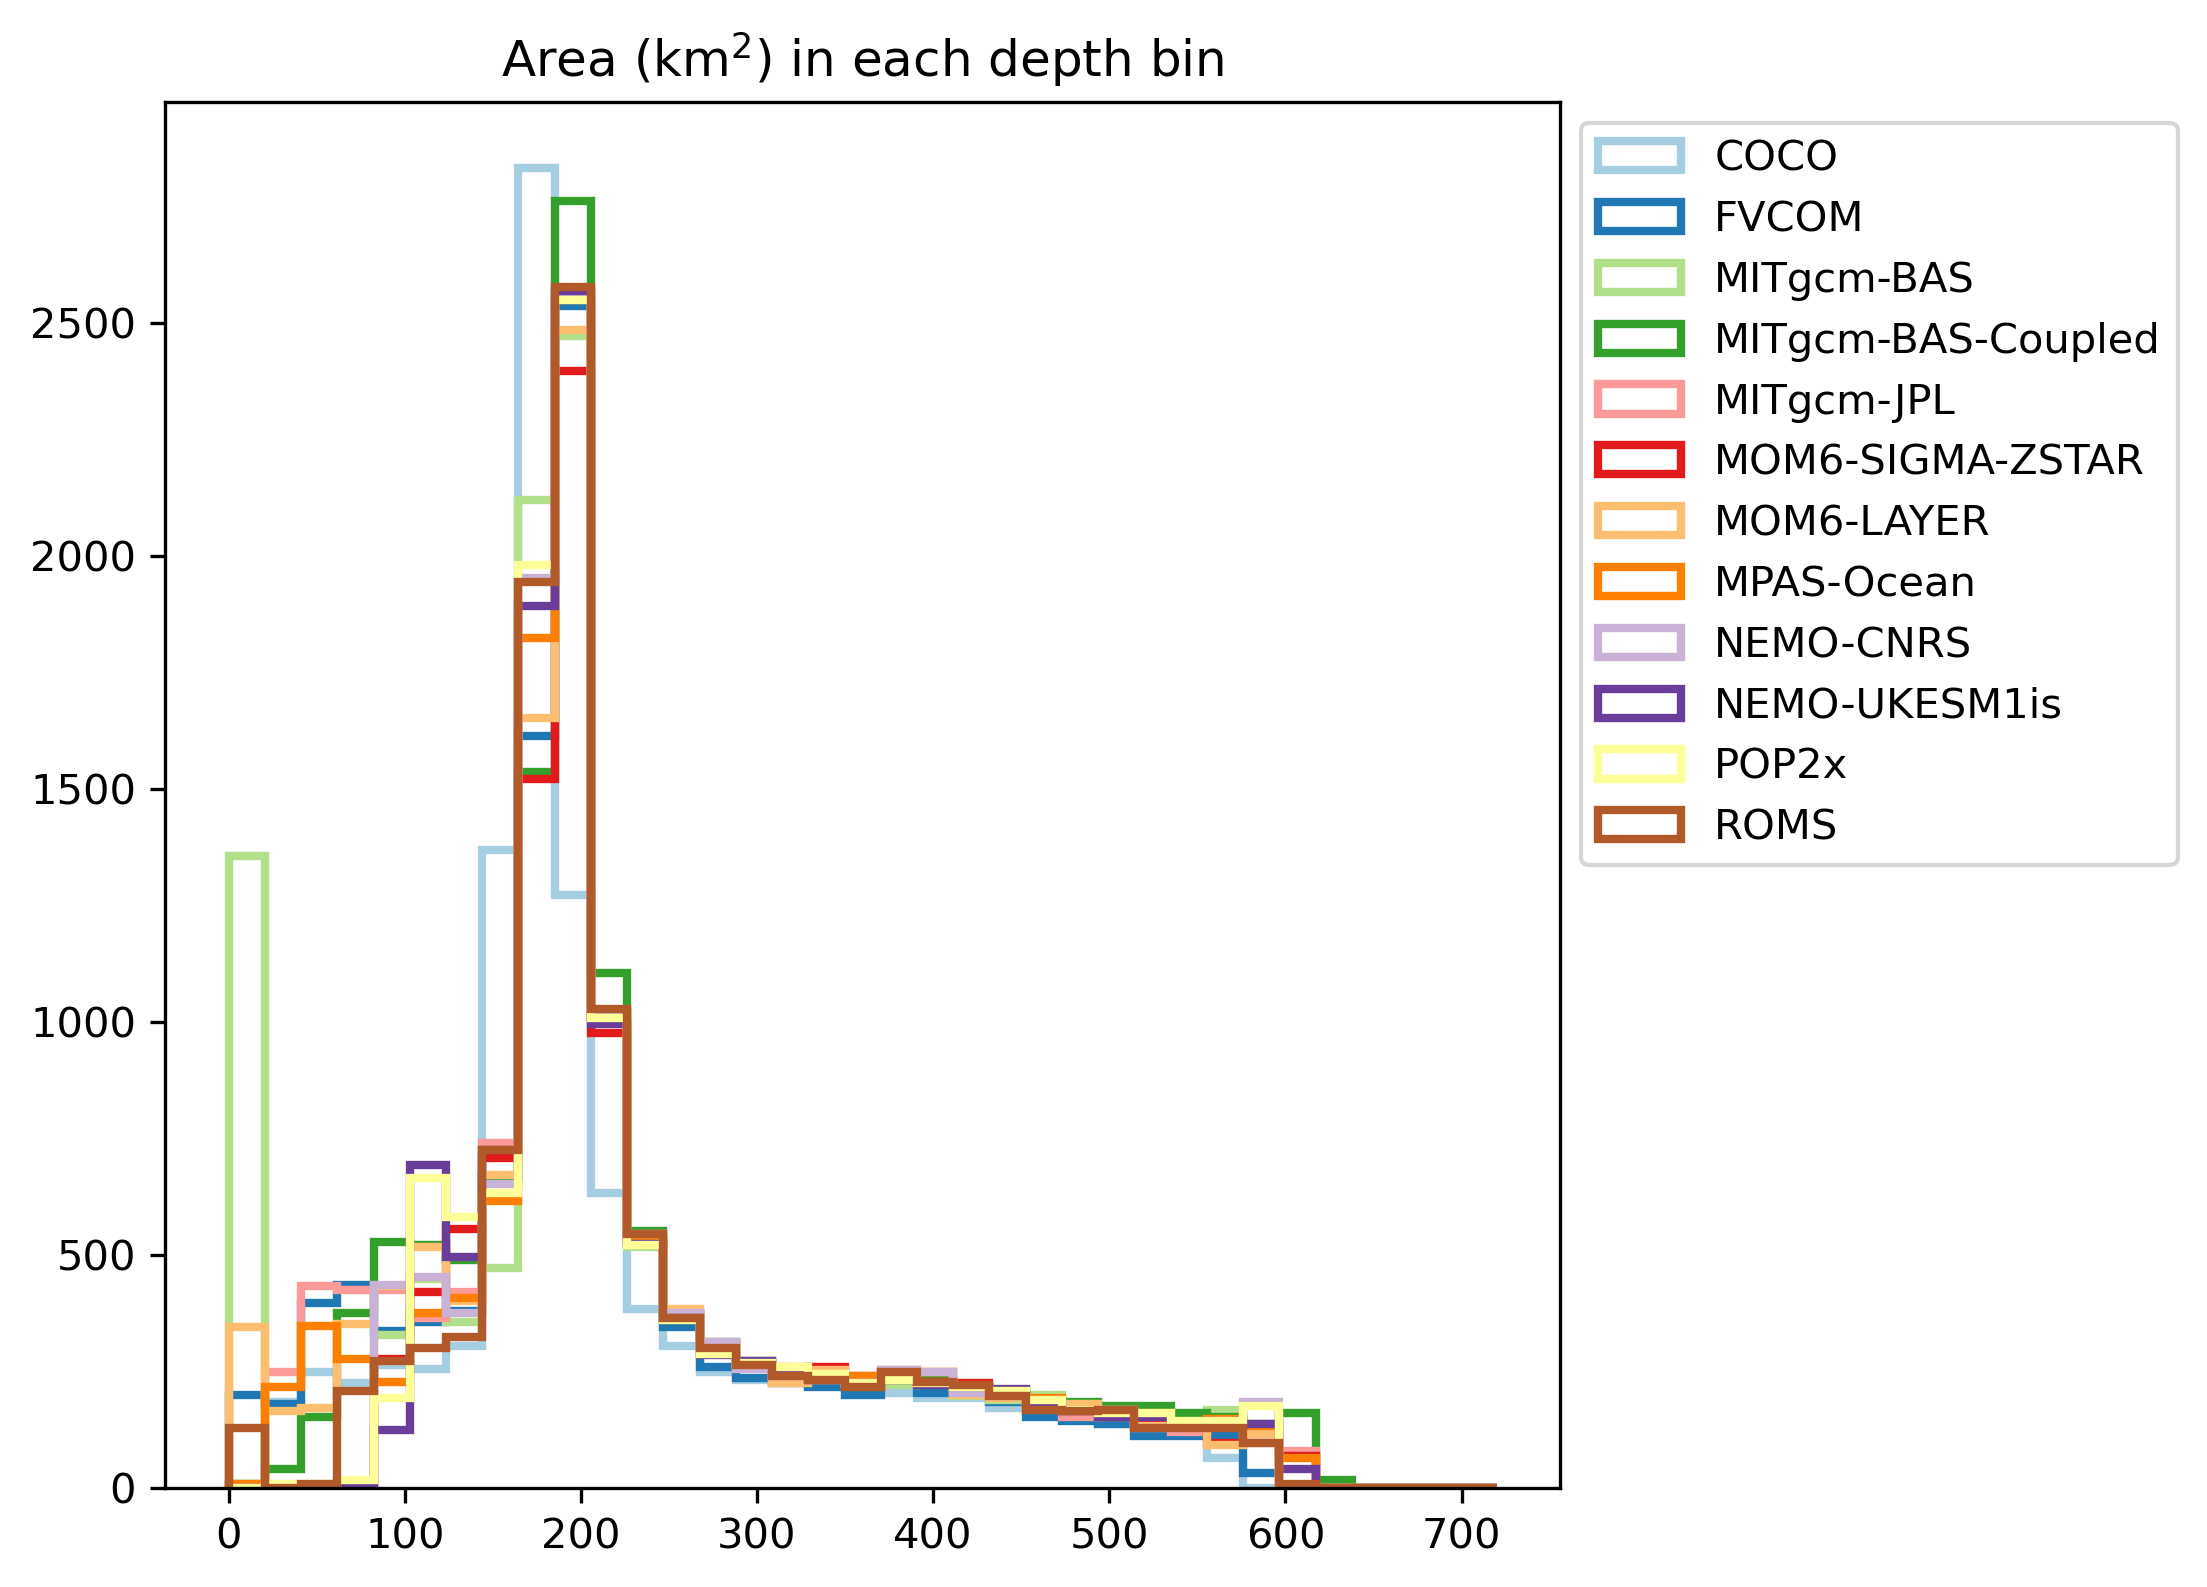

In [24]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,36)

for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)

    plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)), 
             label = labels[i],color = modelcolours[i],
            histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Area (km$^2$) in each depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/4266459253.py:35: RuntimeW

Text(0.5, 1.0, 'Mean thermal driving ($^\\circ$C) in each depth bin')

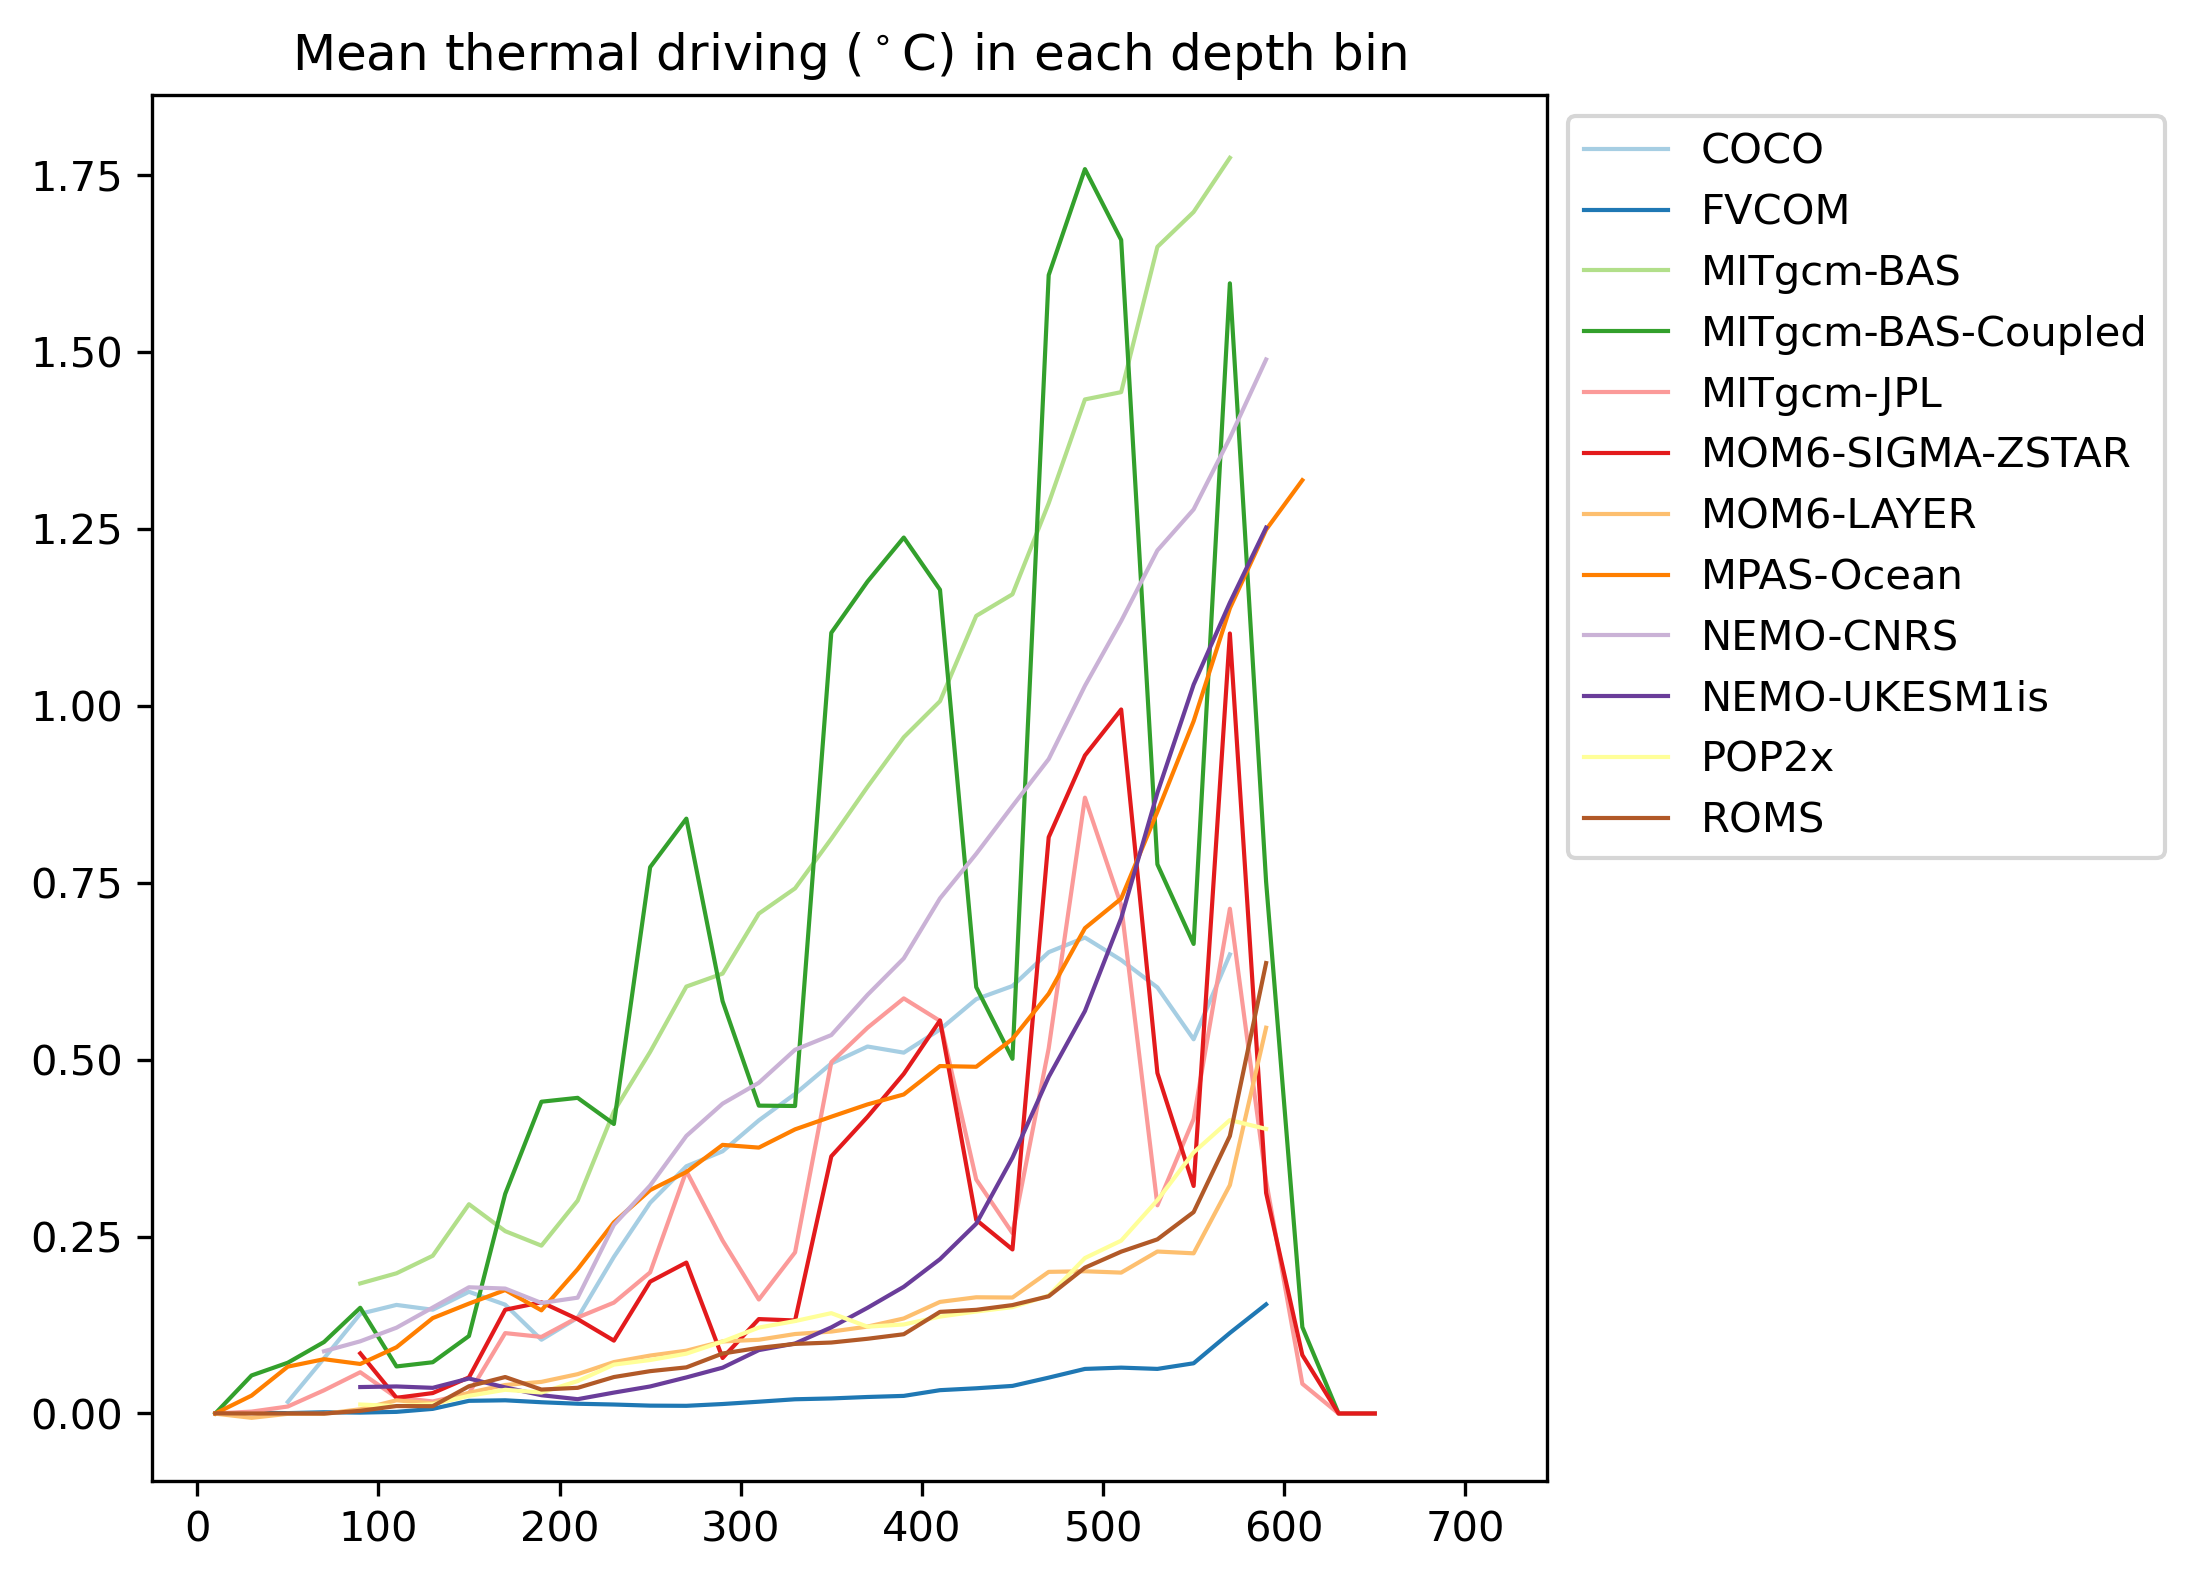

In [61]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(td.fillna(0)))
    c,d = np.histogram(np.ravel(depth.fillna(0)),depth_bins)
    plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
              linewidth = 1)
    # plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)), 
    #          label = labels[i],color = modelcolours[i],
    #         histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Mean thermal driving ($^\circ$C) in each depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc


/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/144124053.py:35: RuntimeWarning

ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Mean friction velocity (ms$^{-1}$) in each depth bin')

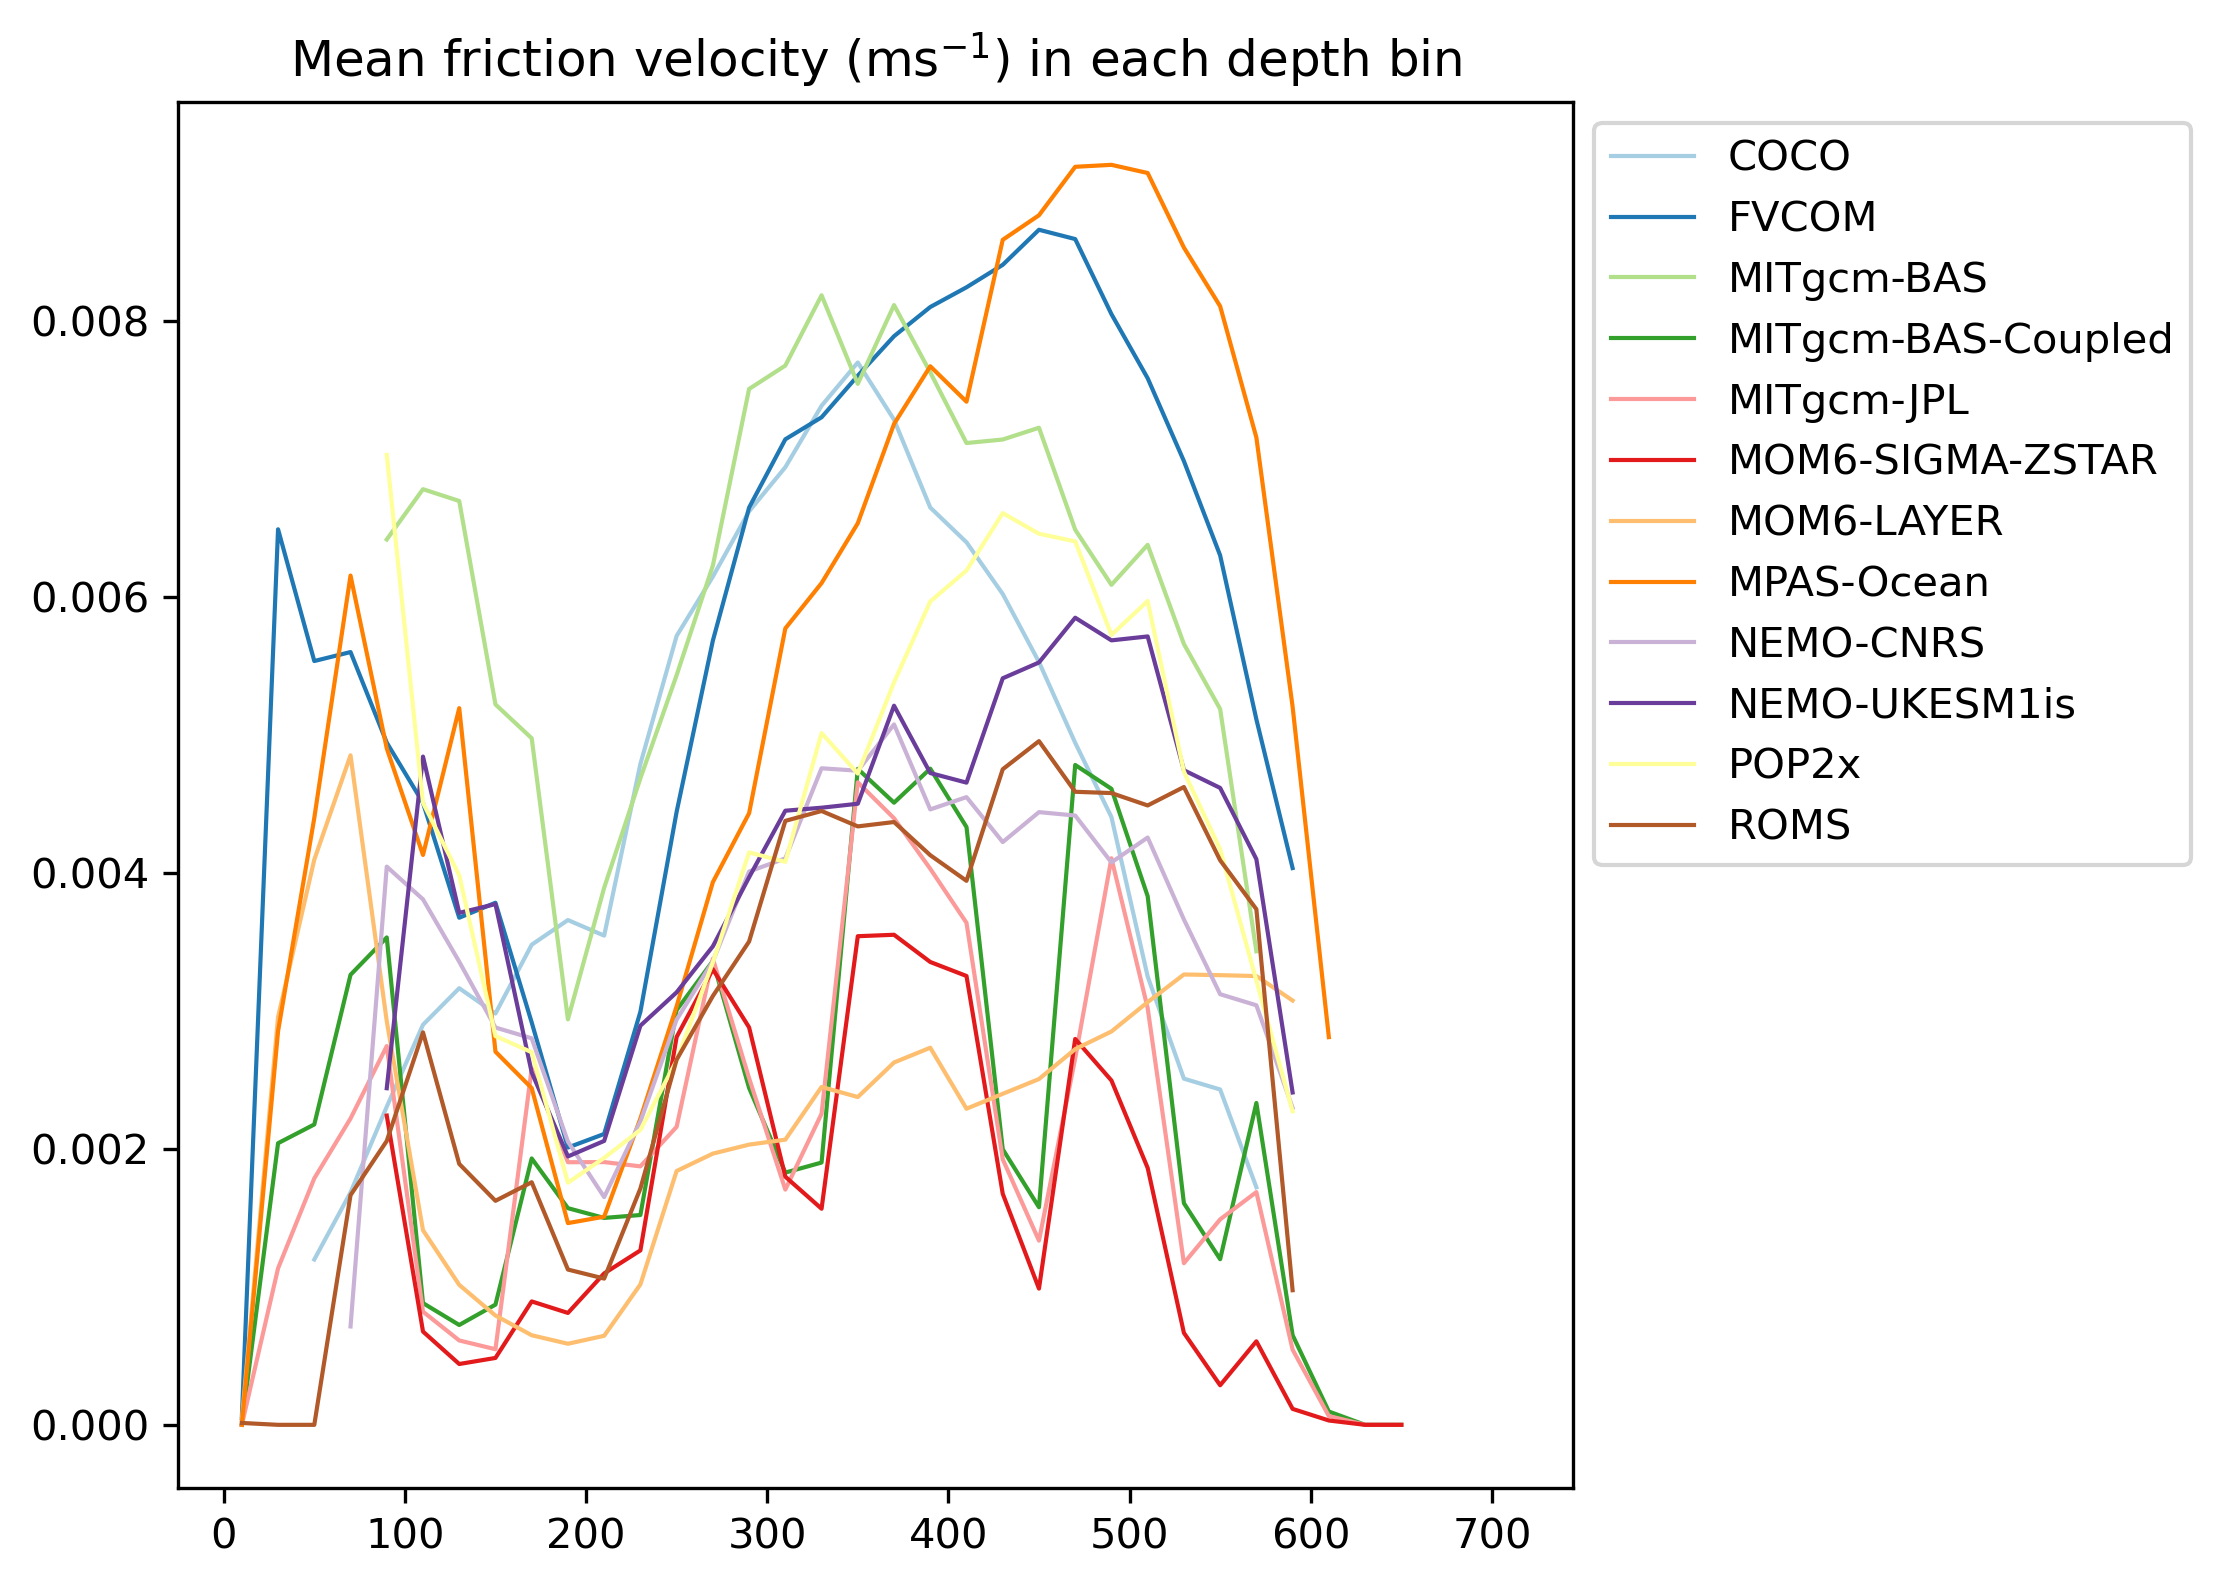

In [60]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    fr = ds.frictionVelocity.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    fr = fr.where(fr < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(fr.fillna(0)))
    c,d = np.histogram(np.ravel(depth.fillna(0)),depth_bins)
    plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
              linewidth = 1)
    # plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)), 
    #          label = labels[i],color = modelcolours[i],
    #         histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Mean friction velocity (ms$^{-1}$) in each depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeWarning: invalid value encountered in divide
  plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
/jobfs/129592830.gadi-pbs/ipykernel_1723708/2844283475.py:35: RuntimeW

Text(0.5, 1.0, 'Mean melt rate (m yr$^{-1}$) in each 20m depth bin')

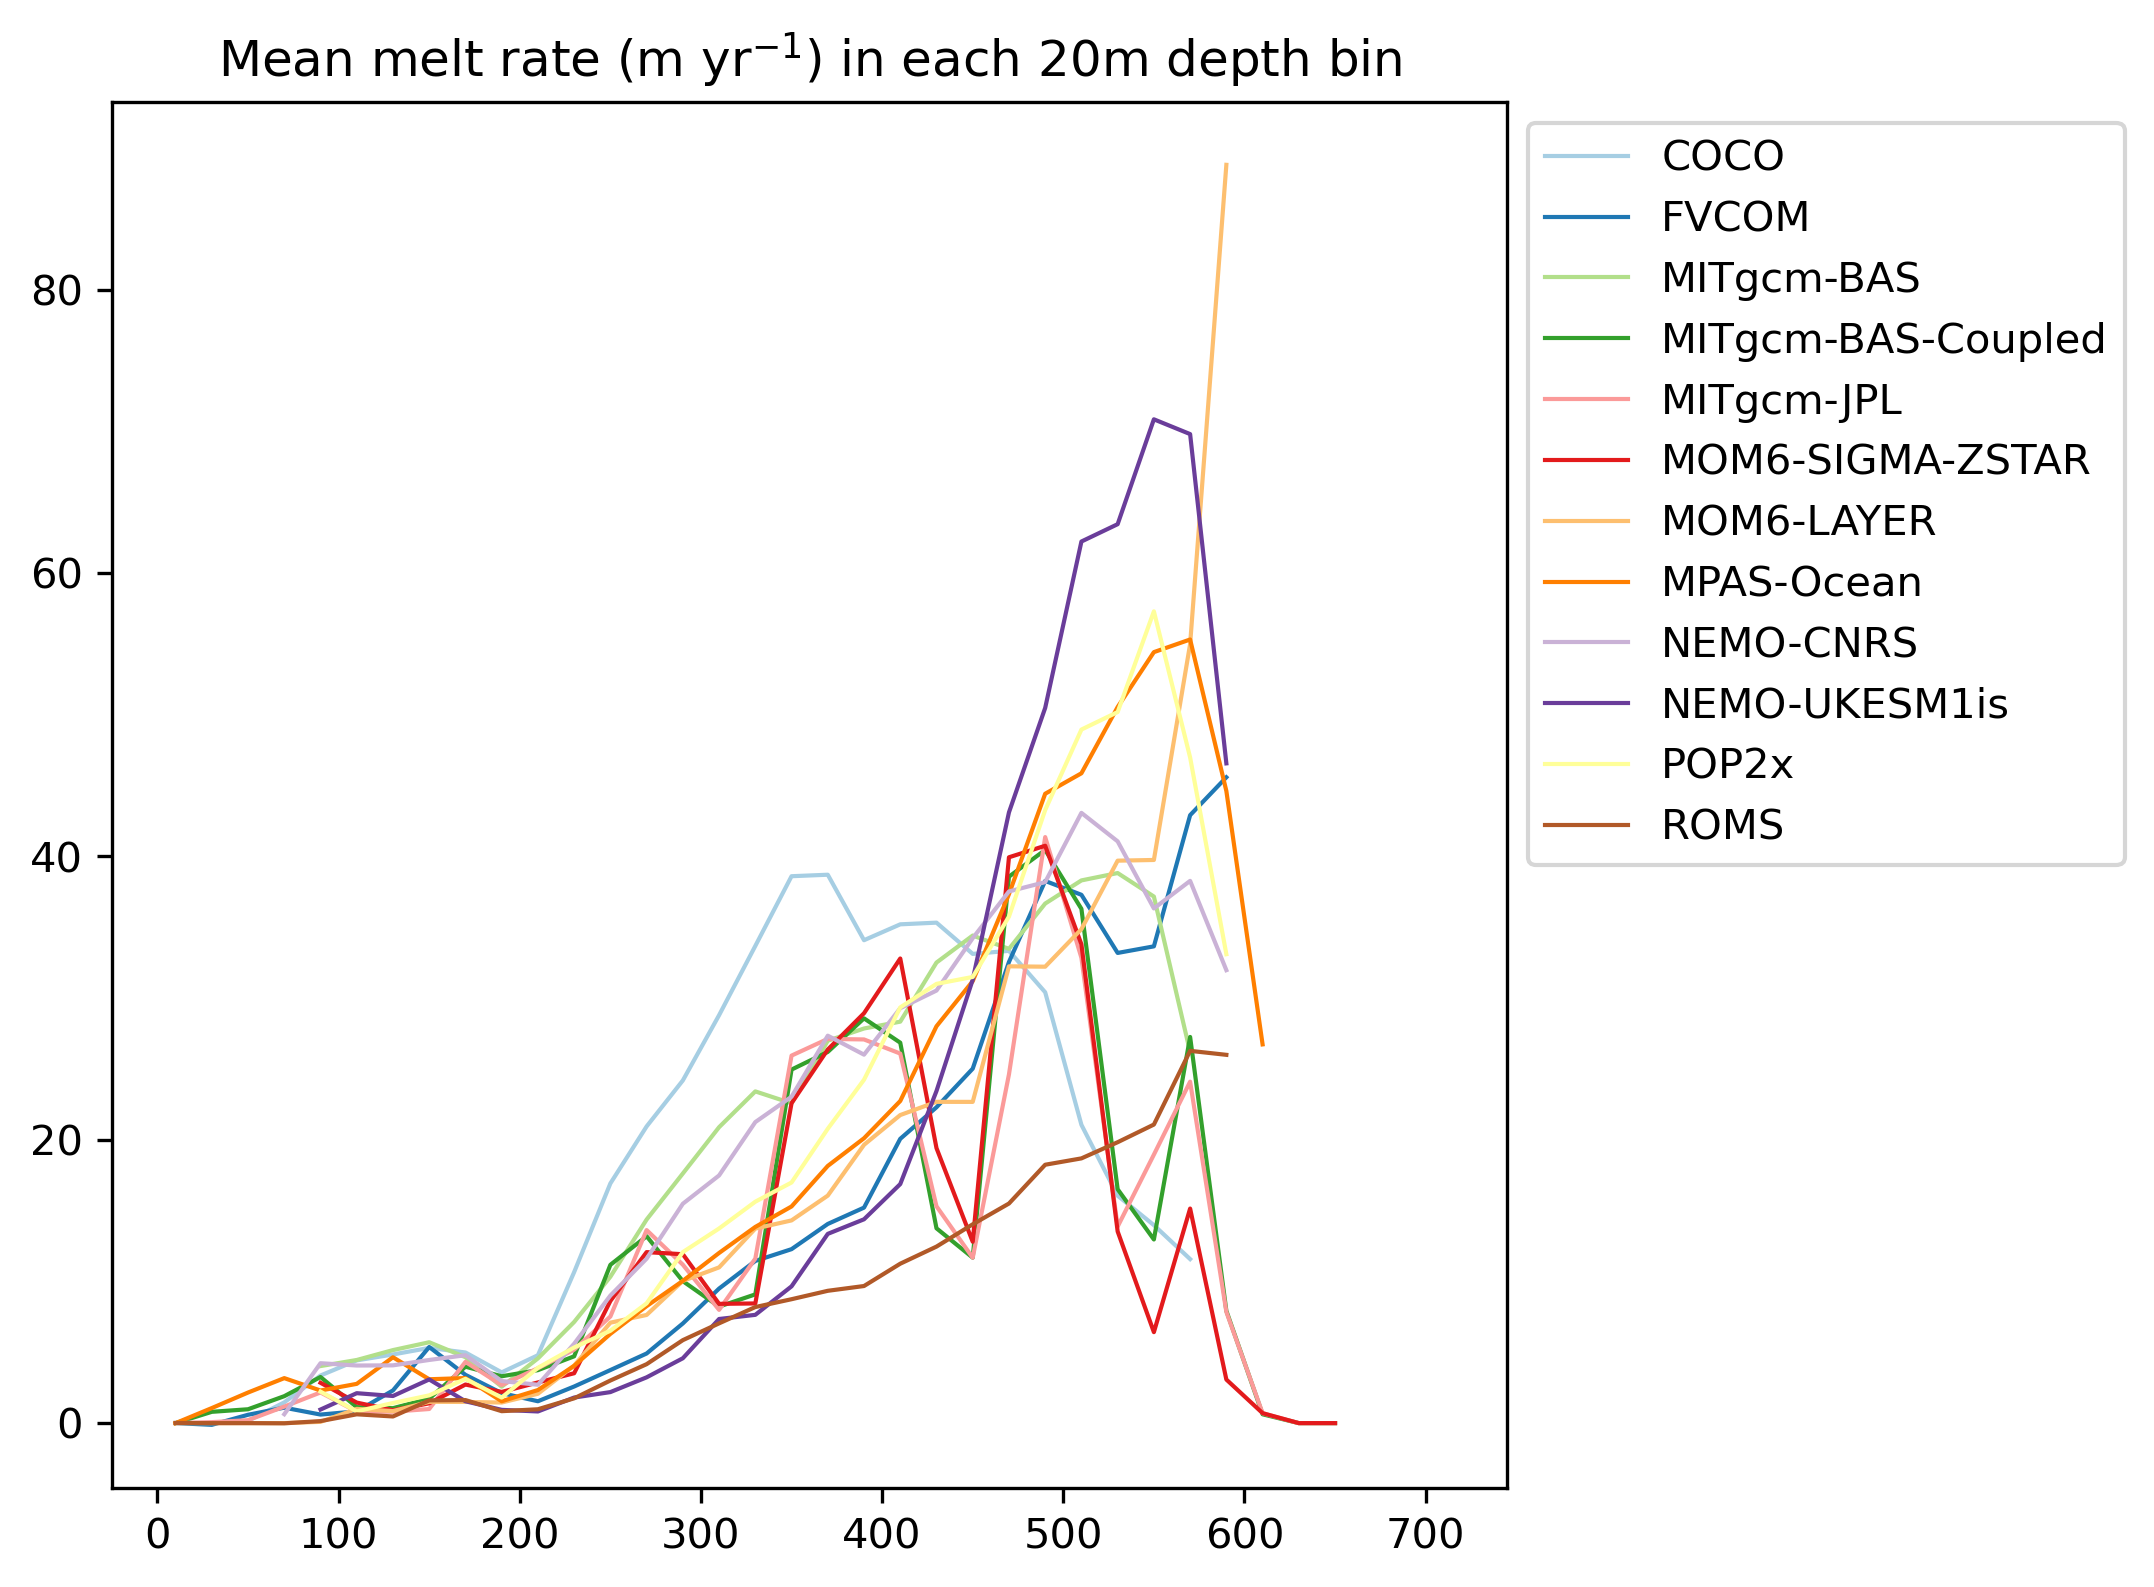

In [62]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = mr.where(mr < 1e36)*sPerYr
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(mr.fillna(0)))
    c,d = np.histogram(np.ravel(depth.fillna(0)),depth_bins)
    plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
              linewidth = 1)
    # plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)), 
    #          label = labels[i],color = modelcolours[i],
    #         histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Mean melt rate (m yr$^{-1}$) in each 20m depth bin')

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


Text(0.5, 1.0, 'Mean melt rate (m yr$^{-1}$) in each 20m depth bin')

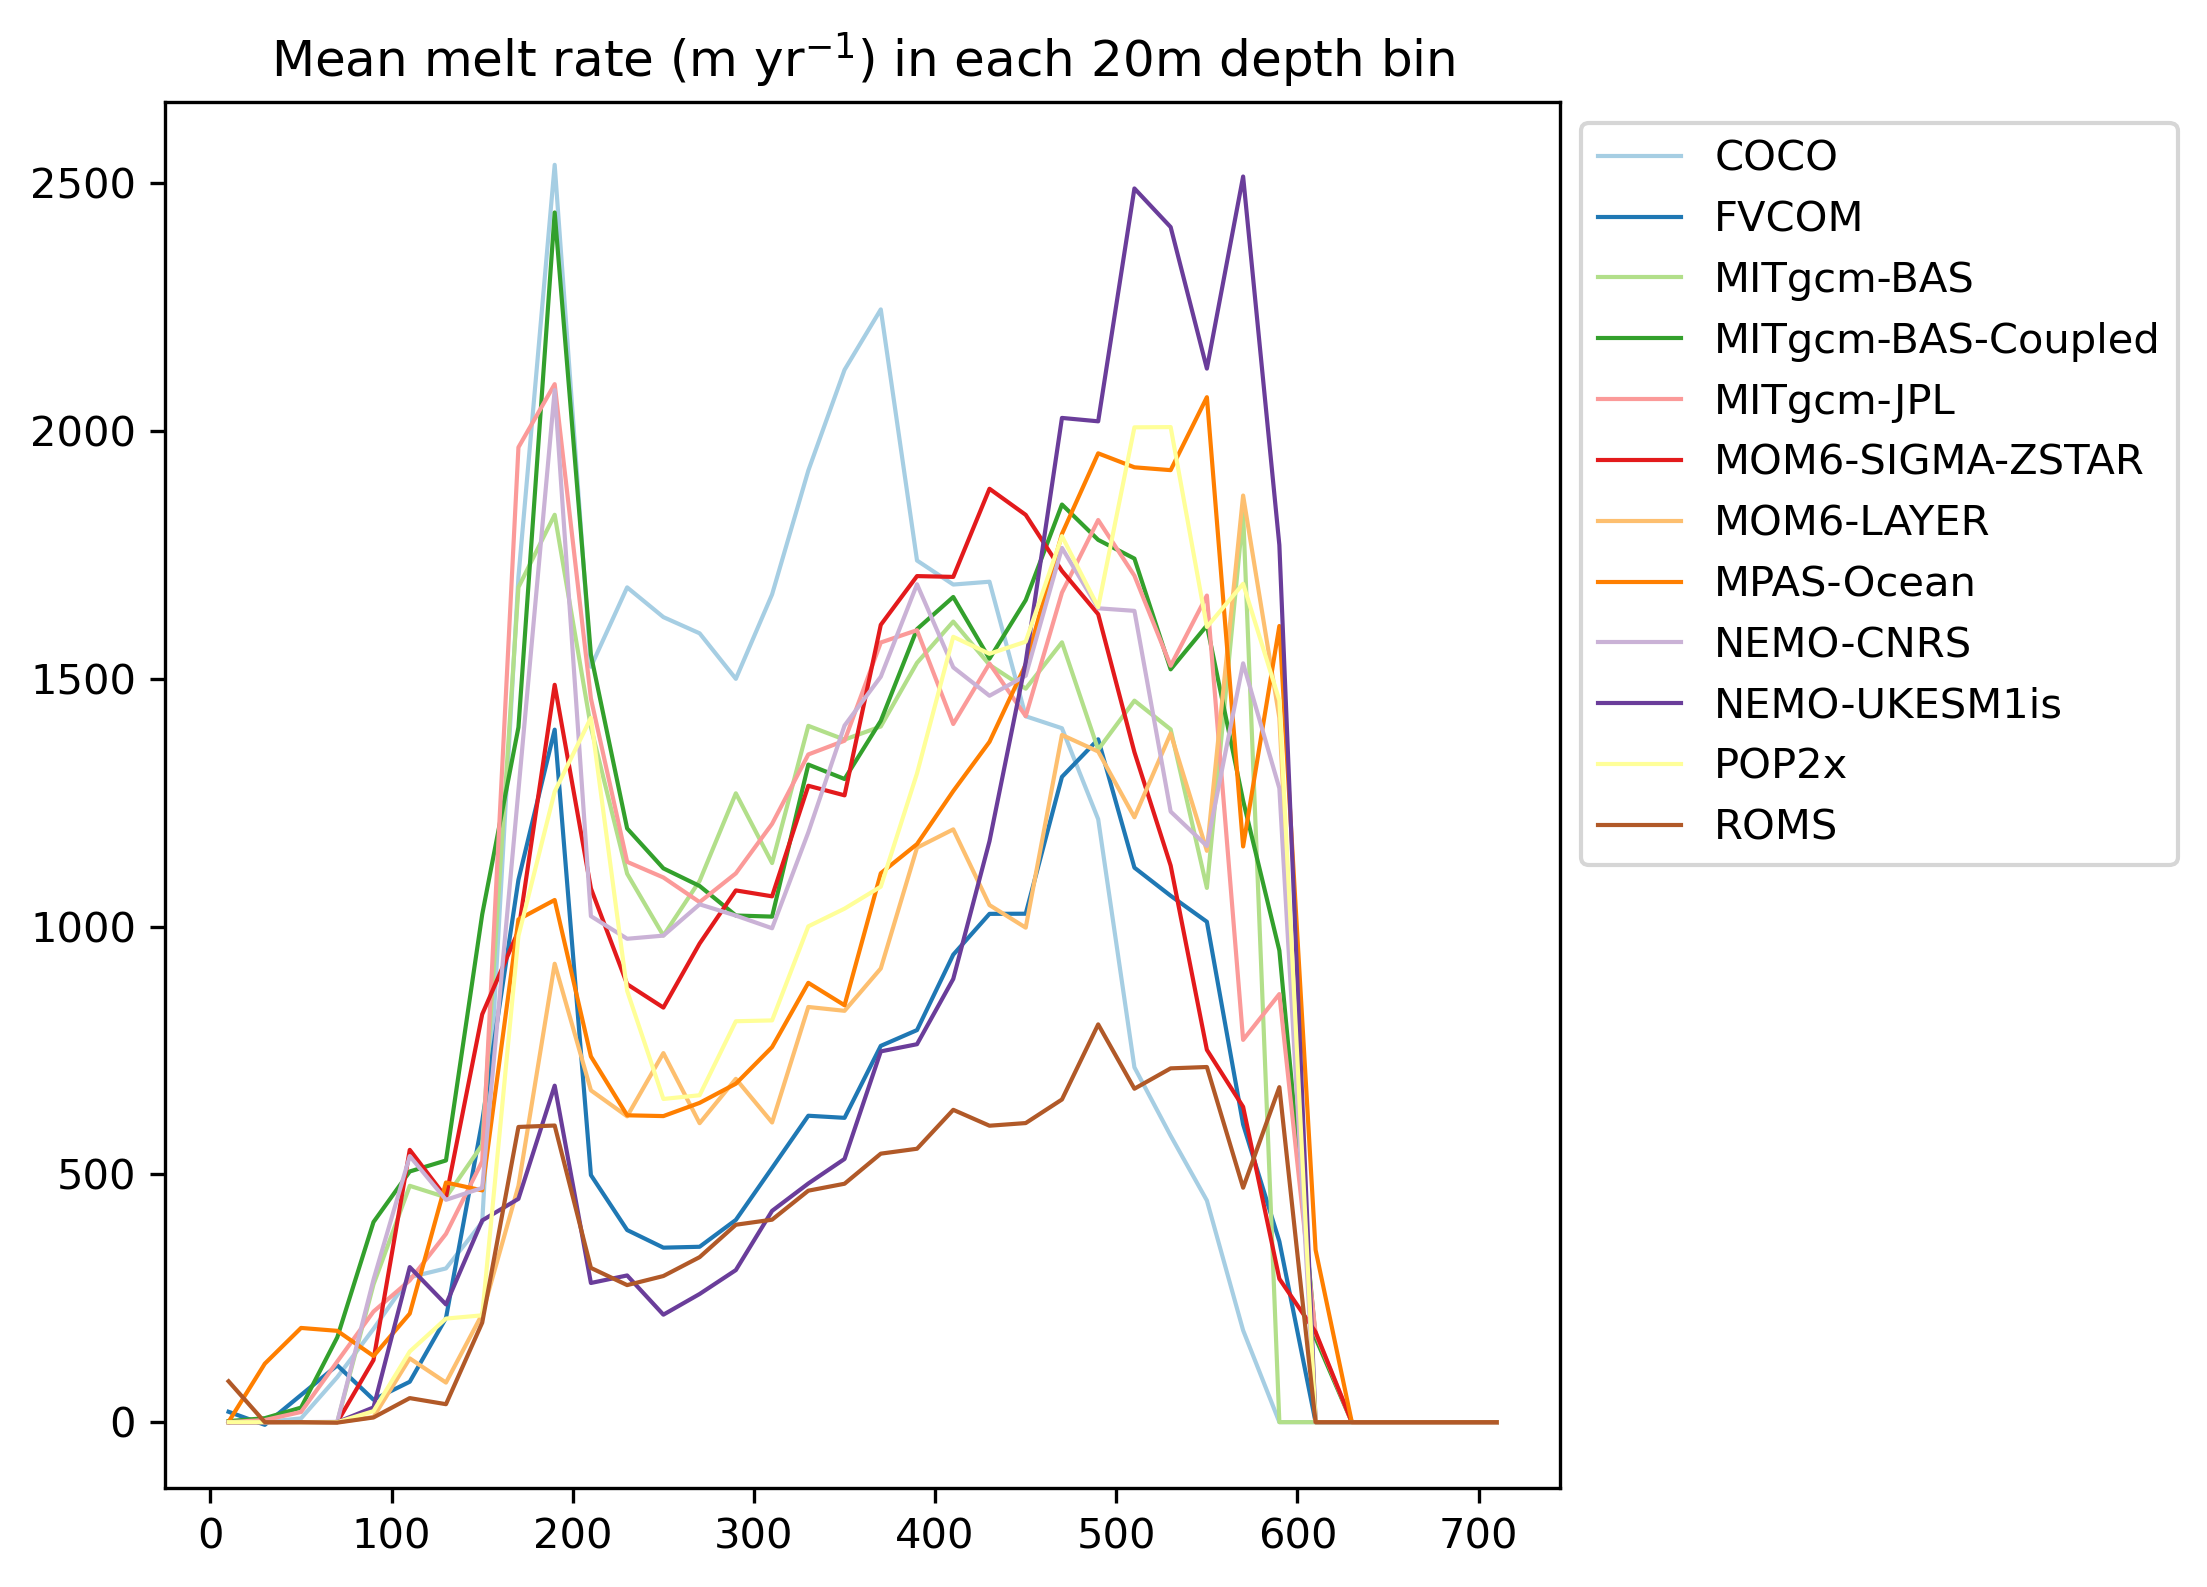

In [59]:
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig,ax = plt.subplots(figsize=(6, 6),facecolor='w',dpi = 300)
time = 12

vmin = -50.
vmax = 50.

xlim = [440., 660.]

#Type of vertical coordinate
vert_coord_type = ['z','s','z','z','z','z/s ALE',r'$\rho$','z/s ALE','z','z','z','s']

depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = mr.where(mr < 1e36)*sPerYr
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(mr.fillna(0)))
    c,d = np.histogram(np.ravel(depth.fillna(0)),depth_bins)
    plt.plot(depth_centres,a/c,label = labels[i],color = modelcolours[i],
              linewidth = 1)
    # plt.hist(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)), 
    #          label = labels[i],color = modelcolours[i],
    #         histtype = 'step', linewidth = 2)

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.title('Mean melt rate normalised by total melt rate in each 20m depth bin')

# Plot together

COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
132919.336152
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
74117.026728
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
118068.40686816783
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
128098.49535926327
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
135598.839696
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
117099.010044
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
129479.499648
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
109425.008268
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
125643.421188
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
103010.84604
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
117634.341528
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc
45140.98773540258
COCO/Ocean0-2 COM/Ocean2_COM_COCO.nc
2804.457306375
FVCOM/Ocean0-2 COM/Ocean2_COM_FVCOM.nc
1216.3453678125
MITgcm-BAS/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS.nc
277.05454713375764
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean2_COM_MITgcm_BAS_CoupledV3.nc
3

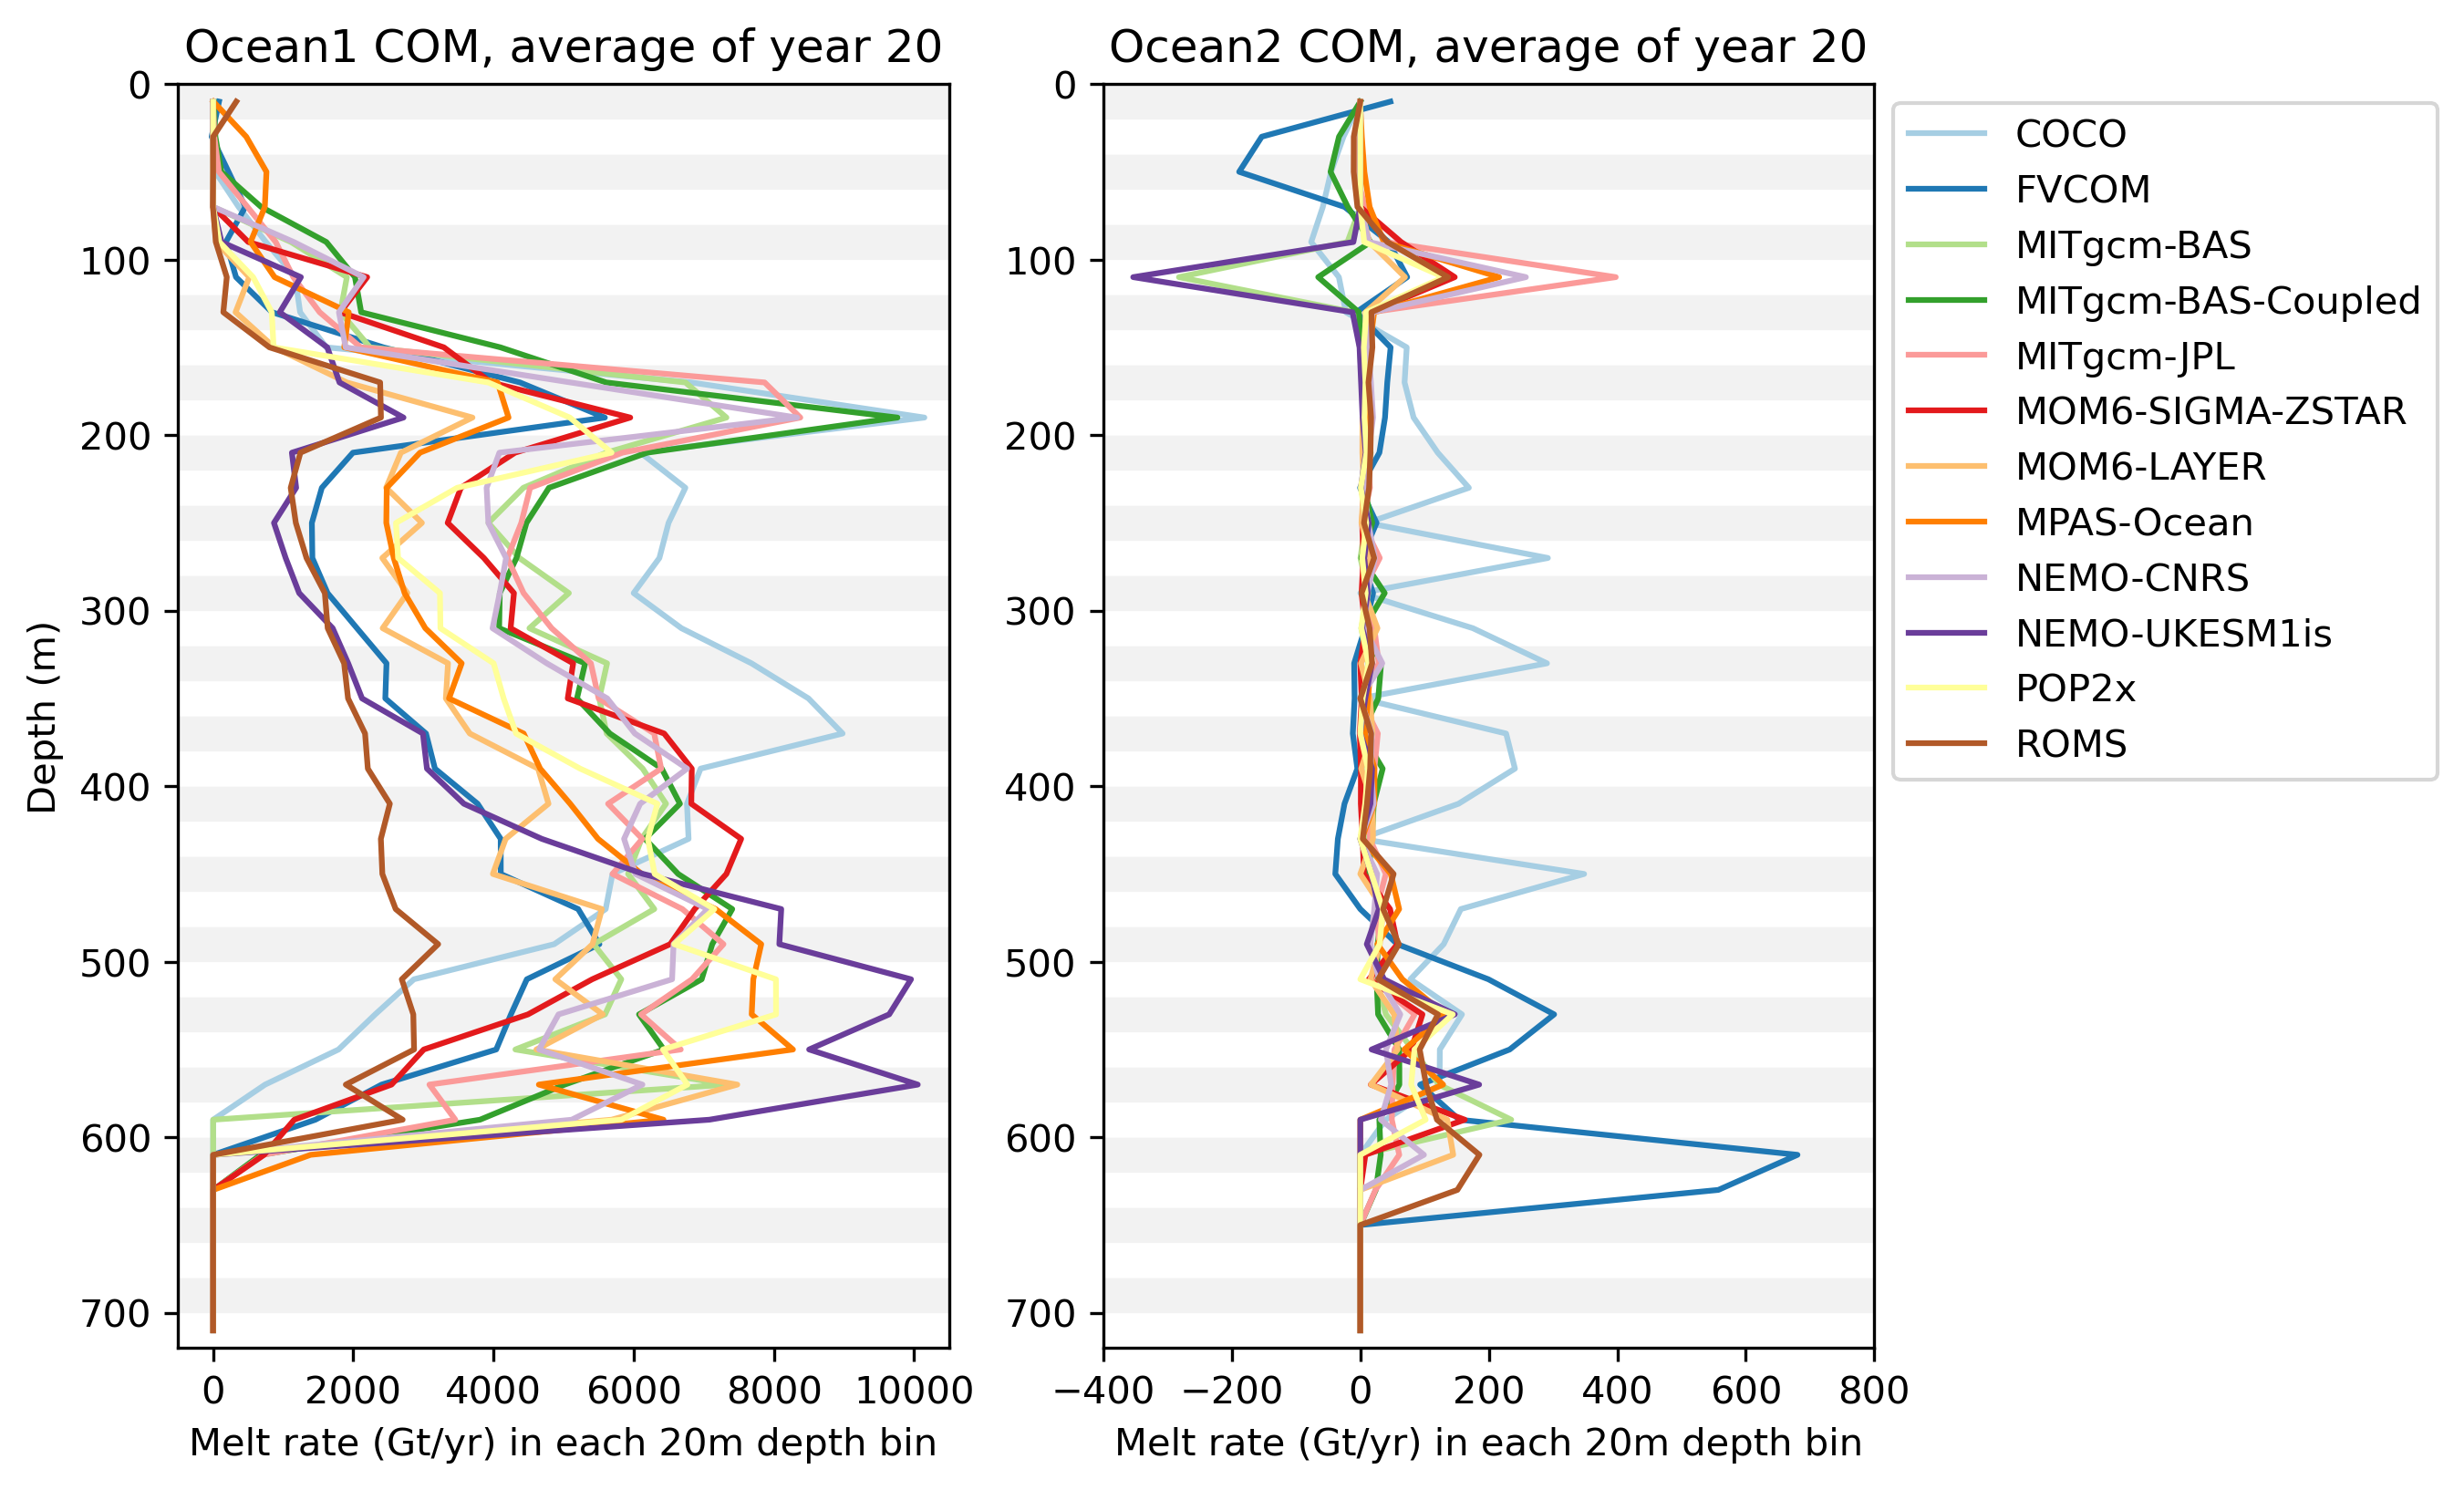

In [5]:
fig,axes = plt.subplots(ncols = 2,figsize=(8, 6),facecolor='w',dpi = 300)
depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]

for j in np.arange(2):
    
    ax = axes[j]
    expt = [Ocean1_COM,Ocean2_COM][j]
    labels = get_labels(expt)
    length = len(expt)
    
    for i in np.arange(length):
        print(expt[i])
        ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
        # make x and y coordinates
        ds = ds.set_coords(['x', 'y', 'time'])
        nTime = ds.sizes['nTime']
        mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
        print(ds.totalMeltFlux.isel(nTime = -1).values*sPerYr/1e9)
        # mr < 1e36 is to get rid of fill values.
        mr = sPerYr * mr.where(mr < 1e36)
        # multiply by area /density to get mr in Gt/yr
        mr = mr*2000**2*1000/1e9
        try:
            draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
        except ValueError:
            draft = ds.iceDraft#.isel(nTime = time)
        depth = np.abs(draft)
        a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel(mr.fillna(0)))
        ax.plot(a,depth_centres,label = labels[i],color = modelcolours[i],
                  linewidth = 1.5)
    xmax = [10500,800][j]
    xmin = [-500,-400][j]    
    for i in np.arange(18):
        ax.fill_between(np.arange(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
    ax.set_ylim(720,0)
    ax.set_xlim(xmin,xmax)
    if j ==0:
        ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Melt rate (Gt/yr) in each 20m depth bin')
    ax.set_title('Ocean'+str(j+1)+' COM, average of year 20')
plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))


COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
132919.336152
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
74117.026728
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
118068.40686816783
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
128098.49535926327
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
135598.839696
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
117099.010044
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
129479.499648
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
109425.008268
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
125643.421188
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
103010.84604
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
117634.341528
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc
45140.98773540258
COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MO

/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:61: RuntimeWarnin

POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc
COCO/Ocean0-2 COM/Ocean1_COM_COCO.nc
FVCOM/Ocean0-2 COM/Ocean1_COM_FVCOM.nc
MITgcm-BAS/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS.nc
MITgcm_BAS_Coupled/Ocean0-2 COM/Ocean1_COM_MITgcm_BAS_CoupledV3.nc
MITgcm-JPL/Ocean0-2 COM/Ocean1_COM_MITgcm_JPL.nc
MOM6_SIGMA_ZSTAR/Ocean0-2 - COM/Ocean1_COM_MOM6_SIGMA_ZSTAR.nc
MOM6/Ocean0-2 COM/Ocean1_COM_MOM6.nc
MPAS-Ocean/Ocean0-2 COM/Ocean1_COM_MPAS-Ocean.nc
NEMO-CNRS/Ocean0-2 COM/Ocean1_COM_NEMO-CNRS.nc
NEMO-UKESM1is/Ocean0-2 COM/Ocean1_COM_NEMO-UKESM1is.nc
POP2x/Ocean0-2 COM/Ocean1_COM_POP2x.nc
ROMS-UTAS/Ocean0-2 COM/Ocean1_COM_ROMSUTAS.nc


/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129696192.gadi-pbs/ipykernel_1334162/1215988827.py:94: RuntimeWarnin

Text(0.5, 0.98, 'Ocean1 COM, year 20')

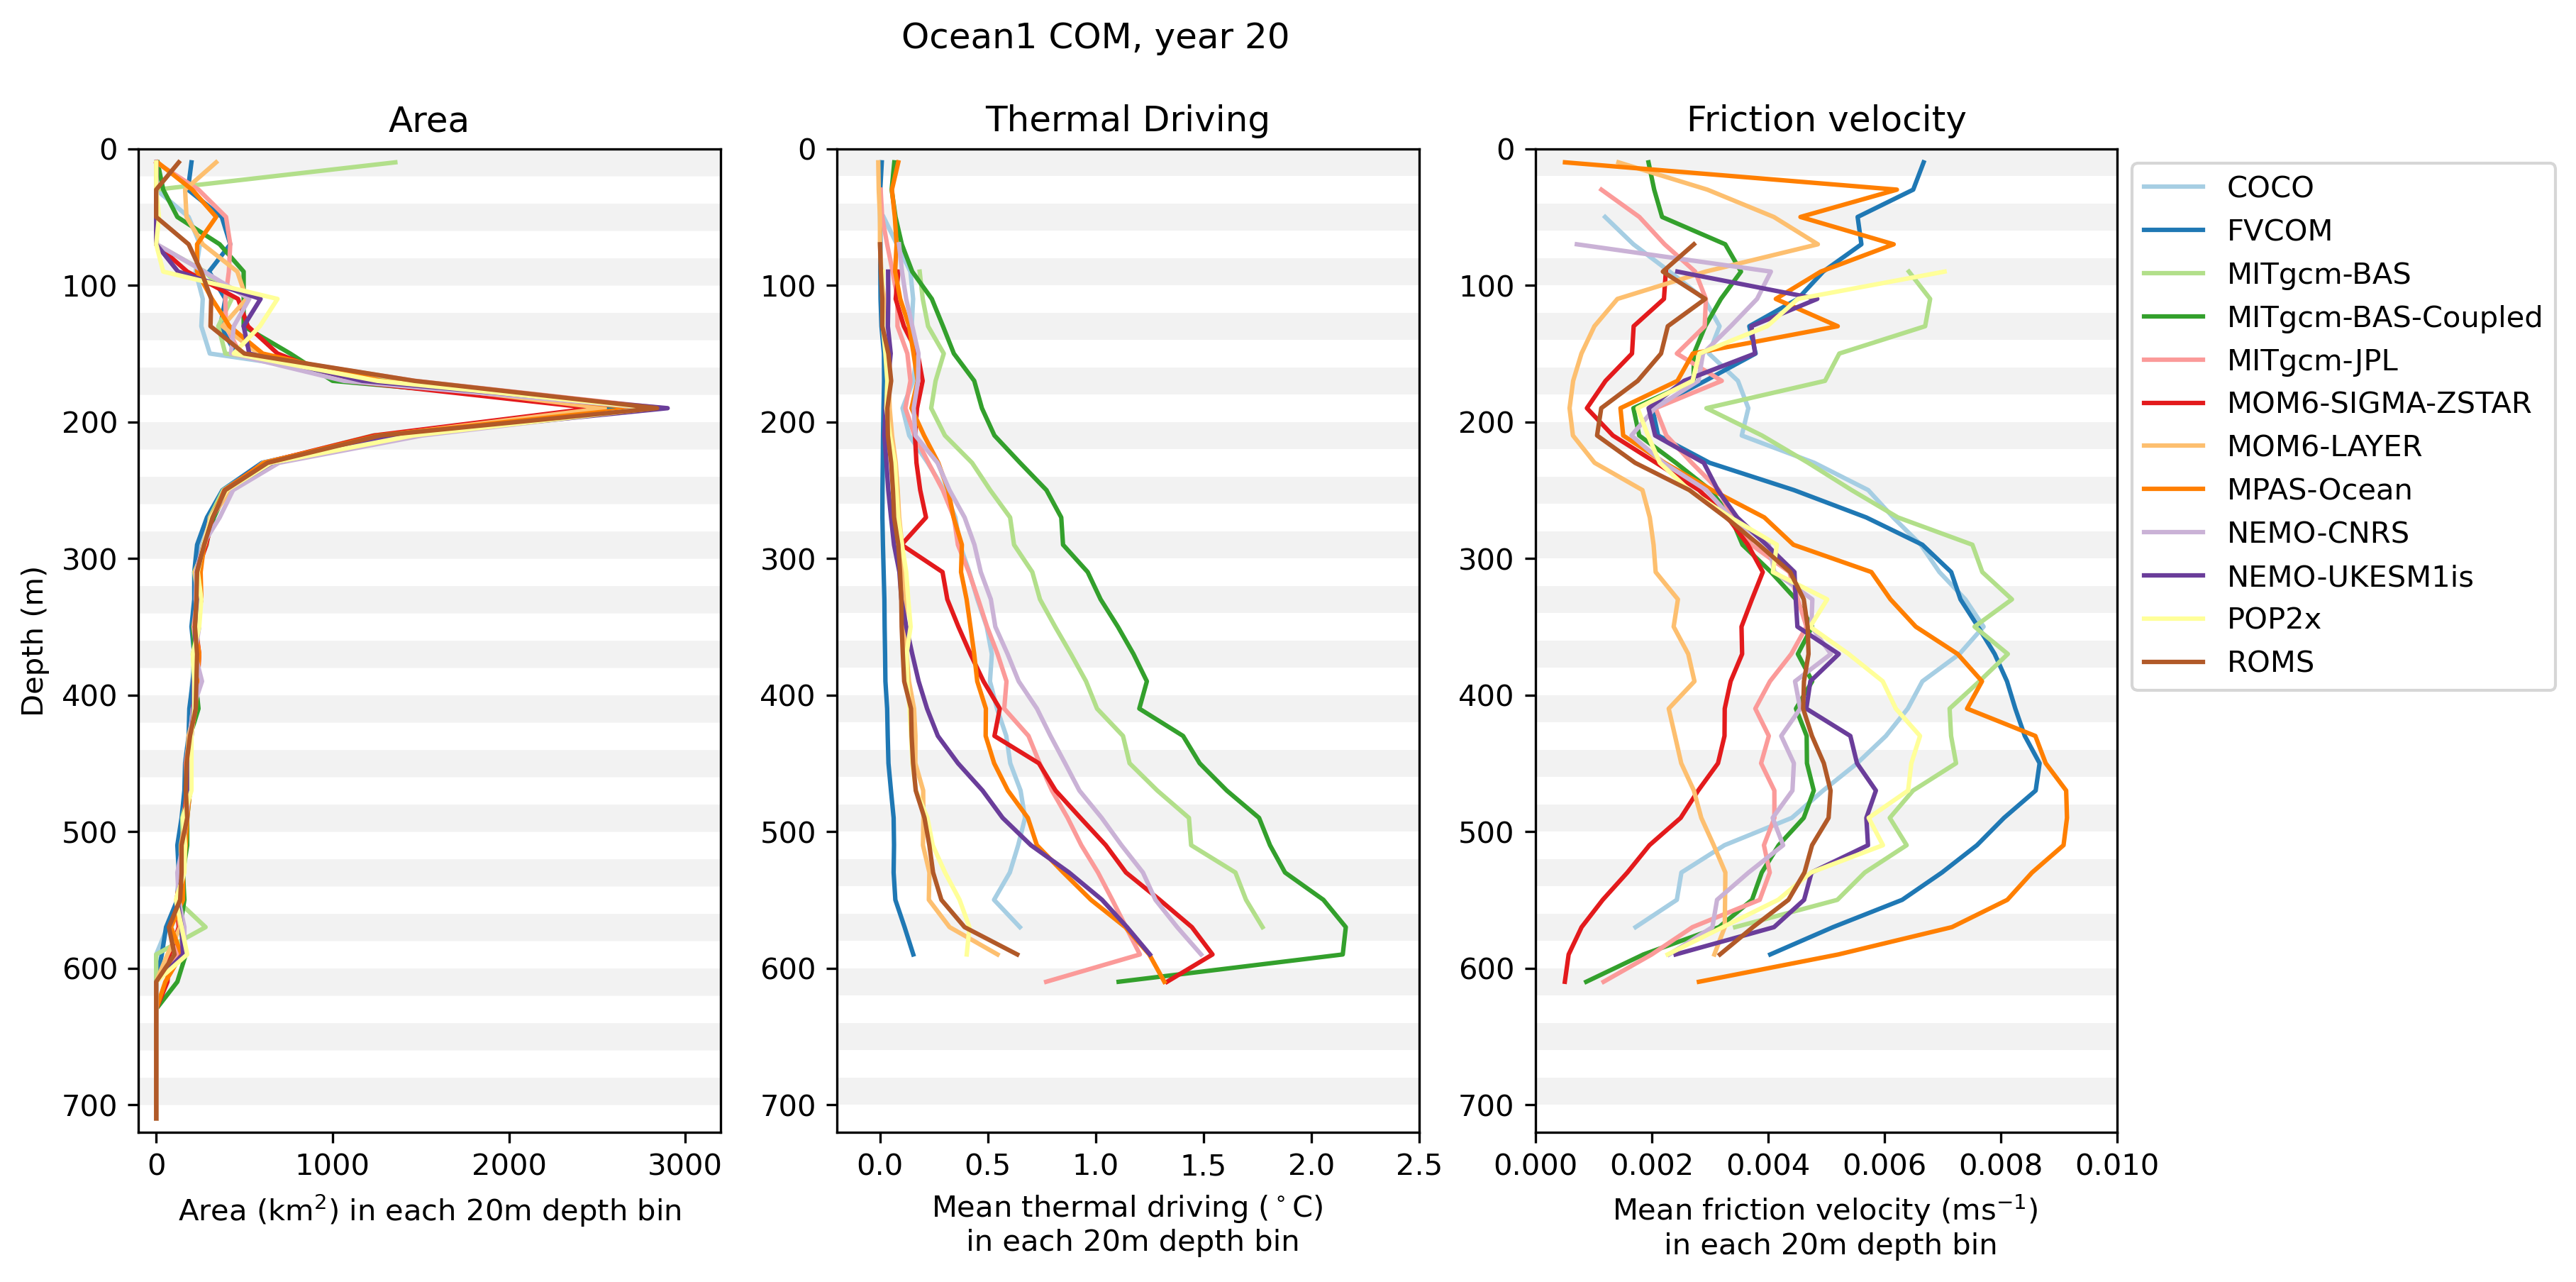

In [53]:
fig,axes = plt.subplots(ncols = 3,figsize=(12, 6),facecolor='w',dpi = 300)
depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
# Plot area
ax = axes[0]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    print(ds.totalMeltFlux.isel(nTime = -1).values*sPerYr/1e9)
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    # multiply by area /density to get mr in Gt/yr
    mr = mr*2000**2*1000/1e9
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)))
    ax.plot(a,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 3200
xmin = -100
for i in np.arange(18):
    ax.fill_between(np.arange(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(720,0)
ax.set_xlim(xmin,xmax)
axes[0].set_ylabel('Depth (m)')
ax.set_xlabel('Area (km$^2$) in each 20m depth bin')
ax.set_title('Area')

# Plot mean thermal driving
ax = axes[1]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9]
    td_ravel = td_ravel[td_ravel<1e9]
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 2.5
xmin = -0.2
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(720,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean thermal driving ($^\circ$C) \n in each 20m depth bin')
ax.set_title('Thermal Driving')

# Plot mean friction velocity
ax = axes[2]
for i in np.arange(length):
    print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.frictionVelocity.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9] #get rid of nans
    td_ravel = td_ravel[td_ravel<1e9] #get rid of nans
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 1e-2
xmin = 0
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(720,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean friction velocity (ms$^{-1}$) \n in each 20m depth bin')
ax.set_title('Friction velocity')

ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))

plt.suptitle('Ocean1 COM, year 20')

/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/4033347291.py:63: RuntimeWarnin

Text(0.5, 1.02, 'Ocean1 COM Melt Rate Distribution with Depth, year 20')

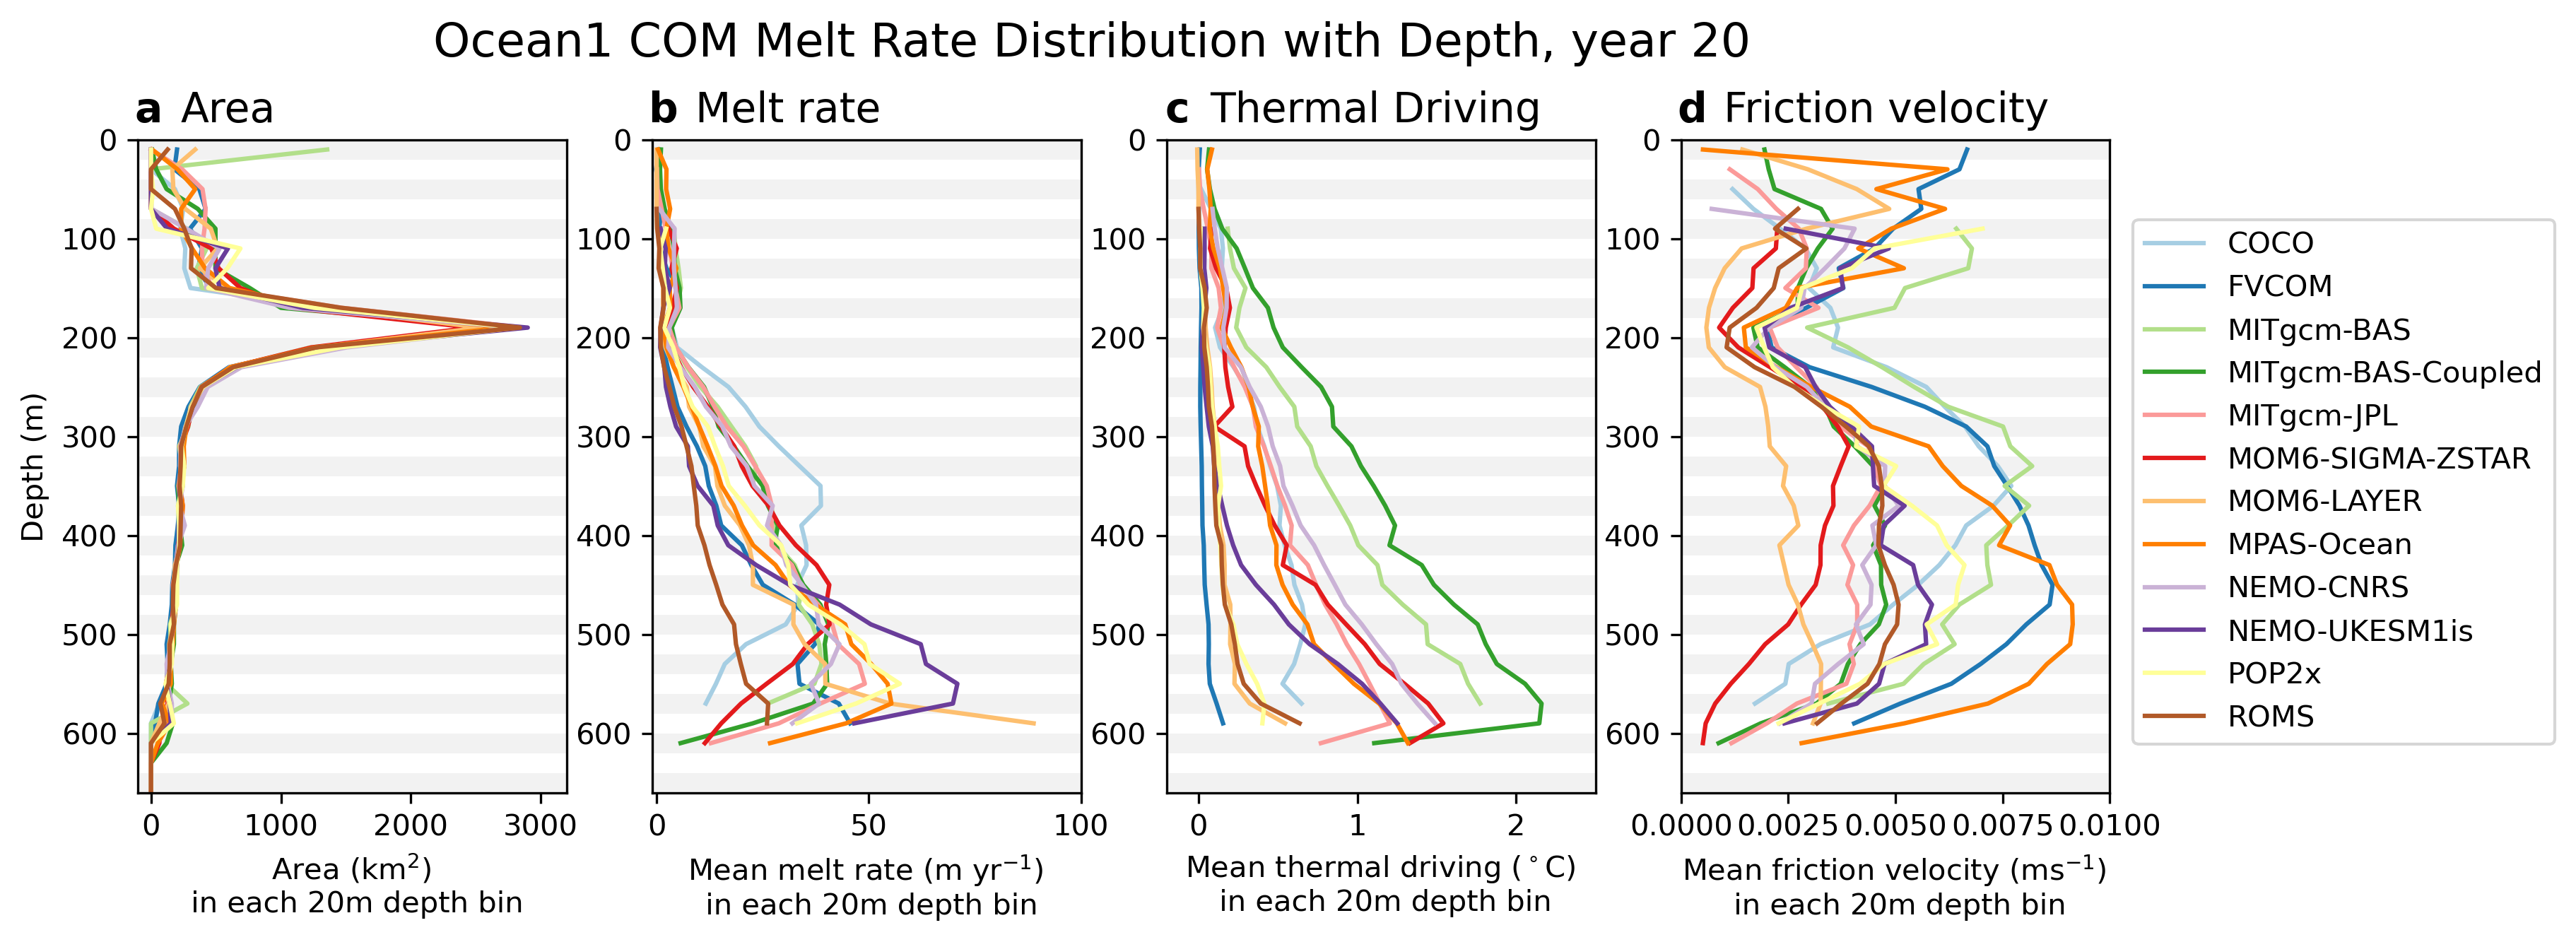

In [33]:
fig,axes = plt.subplots(ncols = 4,figsize=(12, 4),facecolor='w',dpi = 300)
depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
expt = Ocean1_COM
labels = get_labels(expt)
length = len(expt)
# Plot area
ax = axes[0]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    #print(ds.totalMeltFlux.isel(nTime = -1).values*sPerYr/1e9)
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    # multiply by area /density to get mr in Gt/yr
    mr = mr*2000**2*1000/1e9
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)))
    ax.plot(a,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 3200
xmin = -100
for i in np.arange(18):
    ax.fill_between(np.arange(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
axes[0].set_ylabel('Depth (m)')
ax.set_xlabel('Area (km$^2$) \n in each 20m depth bin')
ax.set_title('Area',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

# Plot mean melt
ax = axes[1]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = mr.where(mr < 1e36) * sPerYr
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    mr_ravel = np.ravel(mr)
    depth_ravel = depth_ravel[mr_ravel<1e9]
    mr_ravel = mr_ravel[mr_ravel<1e9]
    a,b = np.histogram(depth_ravel,depth_bins,weights = mr_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 100
xmin = -1
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean melt rate (m yr$^{-1}$) \n in each 20m depth bin')
ax.set_title('Melt rate',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)


# Plot mean thermal driving
ax = axes[2]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9]
    td_ravel = td_ravel[td_ravel<1e9]
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 2.5
xmin = -0.2
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean thermal driving ($^\circ$C) \n in each 20m depth bin')
ax.set_title('Thermal Driving',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

# Plot mean friction velocity
ax = axes[3]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.frictionVelocity.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9] #get rid of nans
    td_ravel = td_ravel[td_ravel<1e9] #get rid of nans
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 1e-2
xmin = 0
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean friction velocity (ms$^{-1}$) \n in each 20m depth bin')
ax.set_title('Friction velocity',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

ax.legend(loc = 'upper left', bbox_to_anchor = (1.02,0.9))

plt.suptitle('Ocean1 COM Melt Rate Distribution with Depth, year 20', fontsize = 16, y = 1.02)

/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarning: invalid value encountered in divide
  ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
/jobfs/129779210.gadi-pbs/ipykernel_1931055/2673759514.py:63: RuntimeWarnin

Text(0.5, 1.02, 'Ocean2 COM Melt Rate Distribution with Depth, year 20')

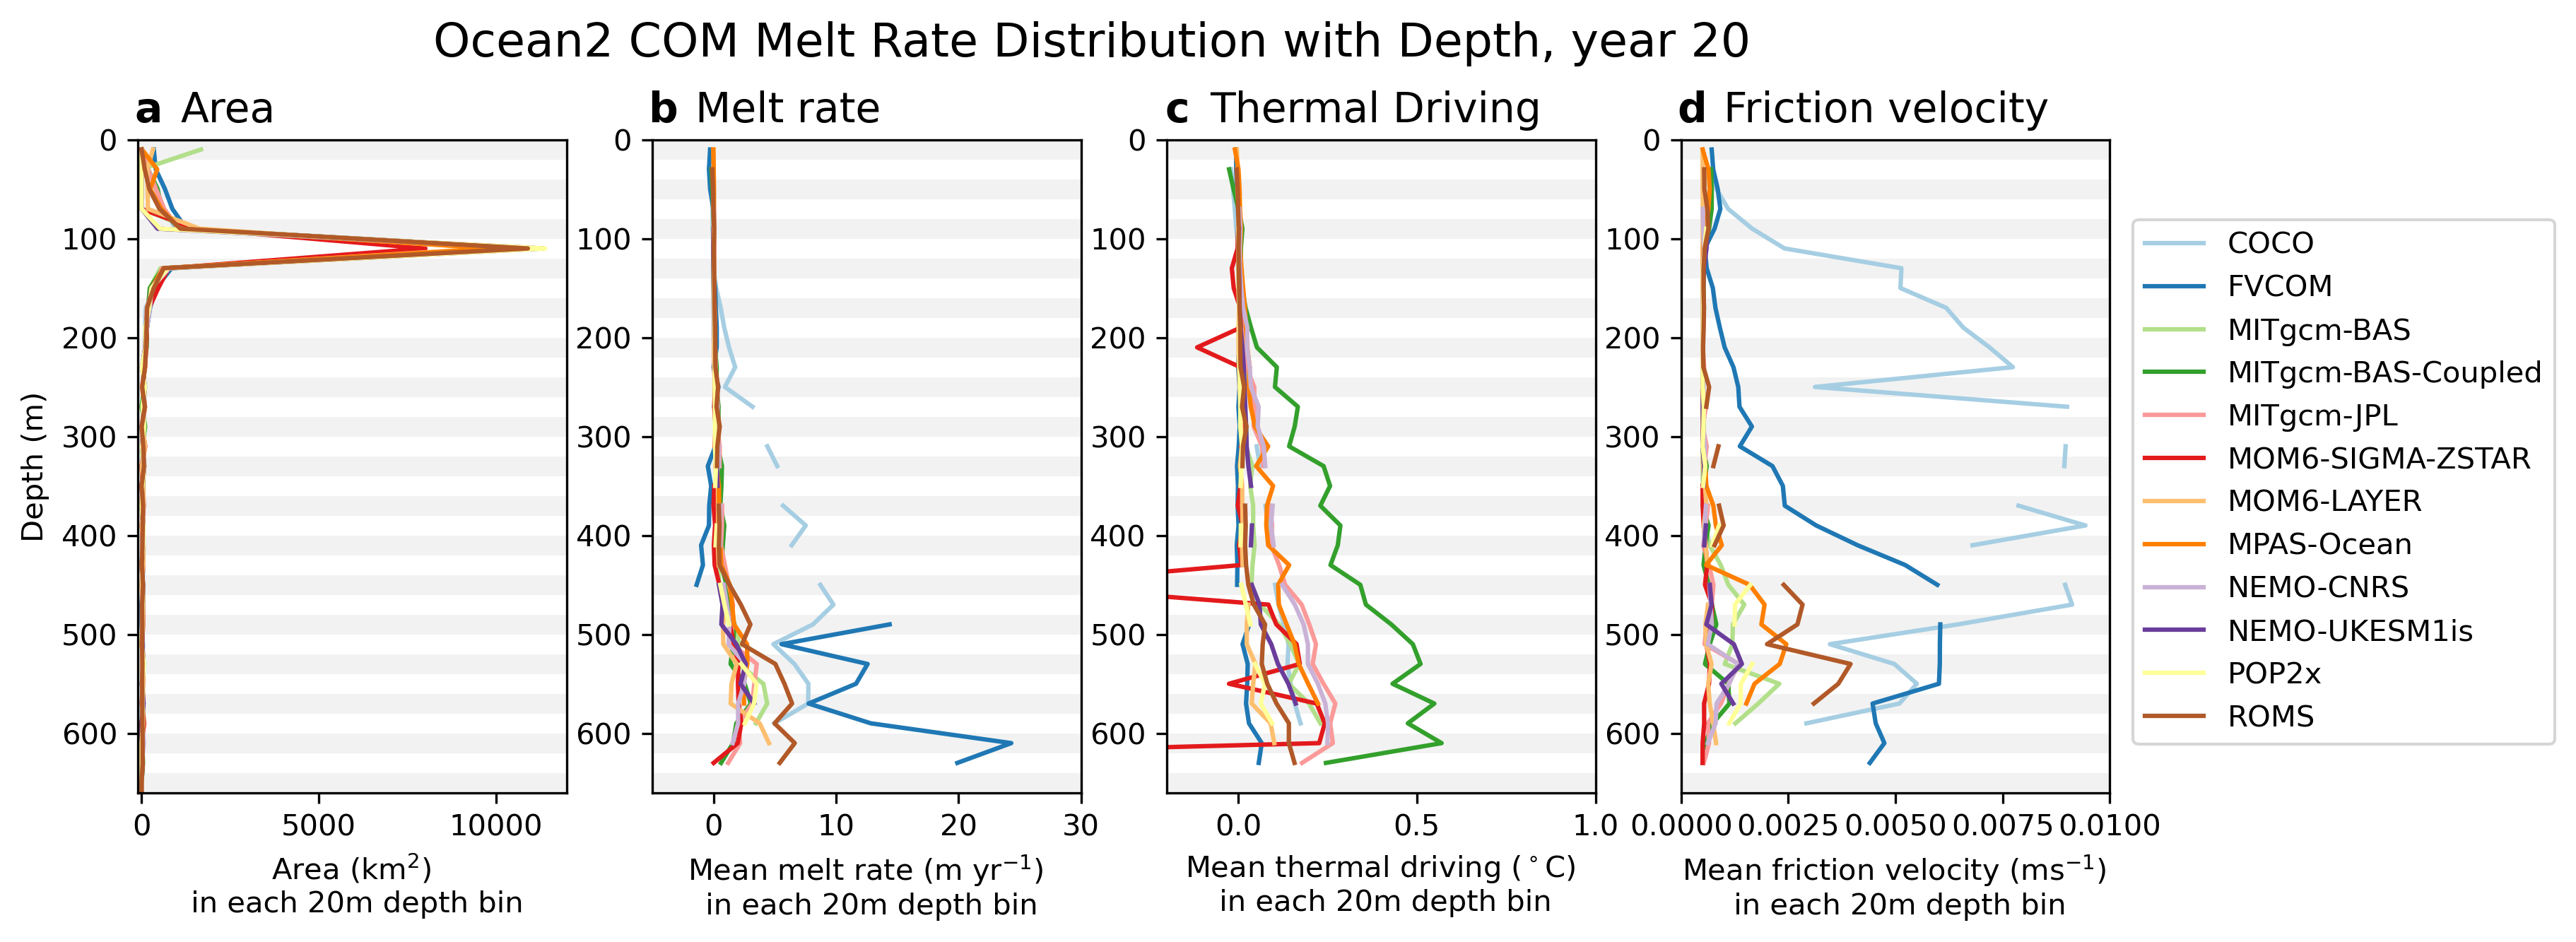

In [34]:
fig,axes = plt.subplots(ncols = 4,figsize=(12, 4),facecolor='w',dpi = 300)
depth_bins = np.linspace(0,720,37)
depth_centres = ((np.linspace(0,720,37) + np.roll(np.linspace(0,720,37),-1))/2)[:-1]
expt = Ocean2_COM
labels = get_labels(expt)
length = len(expt)
# Plot area
ax = axes[0]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    #print(ds.totalMeltFlux.isel(nTime = -1).values*sPerYr/1e9)
    # mr < 1e36 is to get rid of fill values.
    mr = sPerYr * mr.where(mr < 1e36)
    # multiply by area /density to get mr in Gt/yr
    mr = mr*2000**2*1000/1e9
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    a,b = np.histogram(np.ravel(depth.fillna(0)),depth_bins,weights = np.ravel((mr*0+4).fillna(0)))
    ax.plot(a,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 12000
xmin = -100
for i in np.arange(18):
    ax.fill_between(np.arange(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
axes[0].set_ylabel('Depth (m)')
ax.set_xlabel('Area (km$^2$) \n in each 20m depth bin')
ax.set_title('Area',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'a',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

# Plot mean melt
ax = axes[1]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    mr = mr.where(mr < 1e36) * sPerYr
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    mr_ravel = np.ravel(mr)
    depth_ravel = depth_ravel[mr_ravel<1e9]
    mr_ravel = mr_ravel[mr_ravel<1e9]
    a,b = np.histogram(depth_ravel,depth_bins,weights = mr_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 30
xmin = -5
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean melt rate (m yr$^{-1}$) \n in each 20m depth bin')
ax.set_title('Melt rate',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'b',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)


# Plot mean thermal driving
ax = axes[2]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9]
    td_ravel = td_ravel[td_ravel<1e9]
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 1
xmin = -0.2
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean thermal driving ($^\circ$C) \n in each 20m depth bin')
ax.set_title('Thermal Driving',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'c',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

# Plot mean friction velocity
ax = axes[3]
for i in np.arange(length):
    #print(expt[i])
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.frictionVelocity.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    try:
        draft = ds.iceDraft.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    except ValueError:
        draft = ds.iceDraft#.isel(nTime = time)
    depth = np.abs(draft)
    depth_ravel = np.ravel(depth)
    td_ravel = np.ravel(td)
    depth_ravel = depth_ravel[td_ravel<1e9] #get rid of nans
    td_ravel = td_ravel[td_ravel<1e9] #get rid of nans
    a,b = np.histogram(depth_ravel,depth_bins,weights = td_ravel)
    c,d = np.histogram(depth_ravel,depth_bins)
    ax.plot(a/c,depth_centres,label = labels[i],color = modelcolours[i],
              linewidth = 1.5)
xmax = 1e-2
xmin = 0
for i in np.arange(18):
    ax.fill_between(np.linspace(xmin,xmax), depth_bins[2*i],depth_bins[2*i+1],color = 'grey',alpha = 0.1,linewidth = 0)
ax.set_ylim(660,0)
ax.set_xlim(xmin,xmax)
ax.set_xlabel('Mean friction velocity (ms$^{-1}$) \n in each 20m depth bin')
ax.set_title('Friction velocity',fontsize = 14,ha='left', x=0.1)
ax.text(0.025,1.045,'d',horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 14)

ax.legend(loc = 'upper left', bbox_to_anchor = (1.02,0.9))

plt.suptitle('Ocean2 COM Melt Rate Distribution with Depth, year 20', fontsize = 16, y = 1.02)

# Melt rate along x and y transects

In [14]:
ds.x.isel(nx = 90)

<xarray.DataArray 'x' ()>
array(501000., dtype=float32)
Coordinates:
    x        float32 5.01e+05
Attributes:
    units:    m

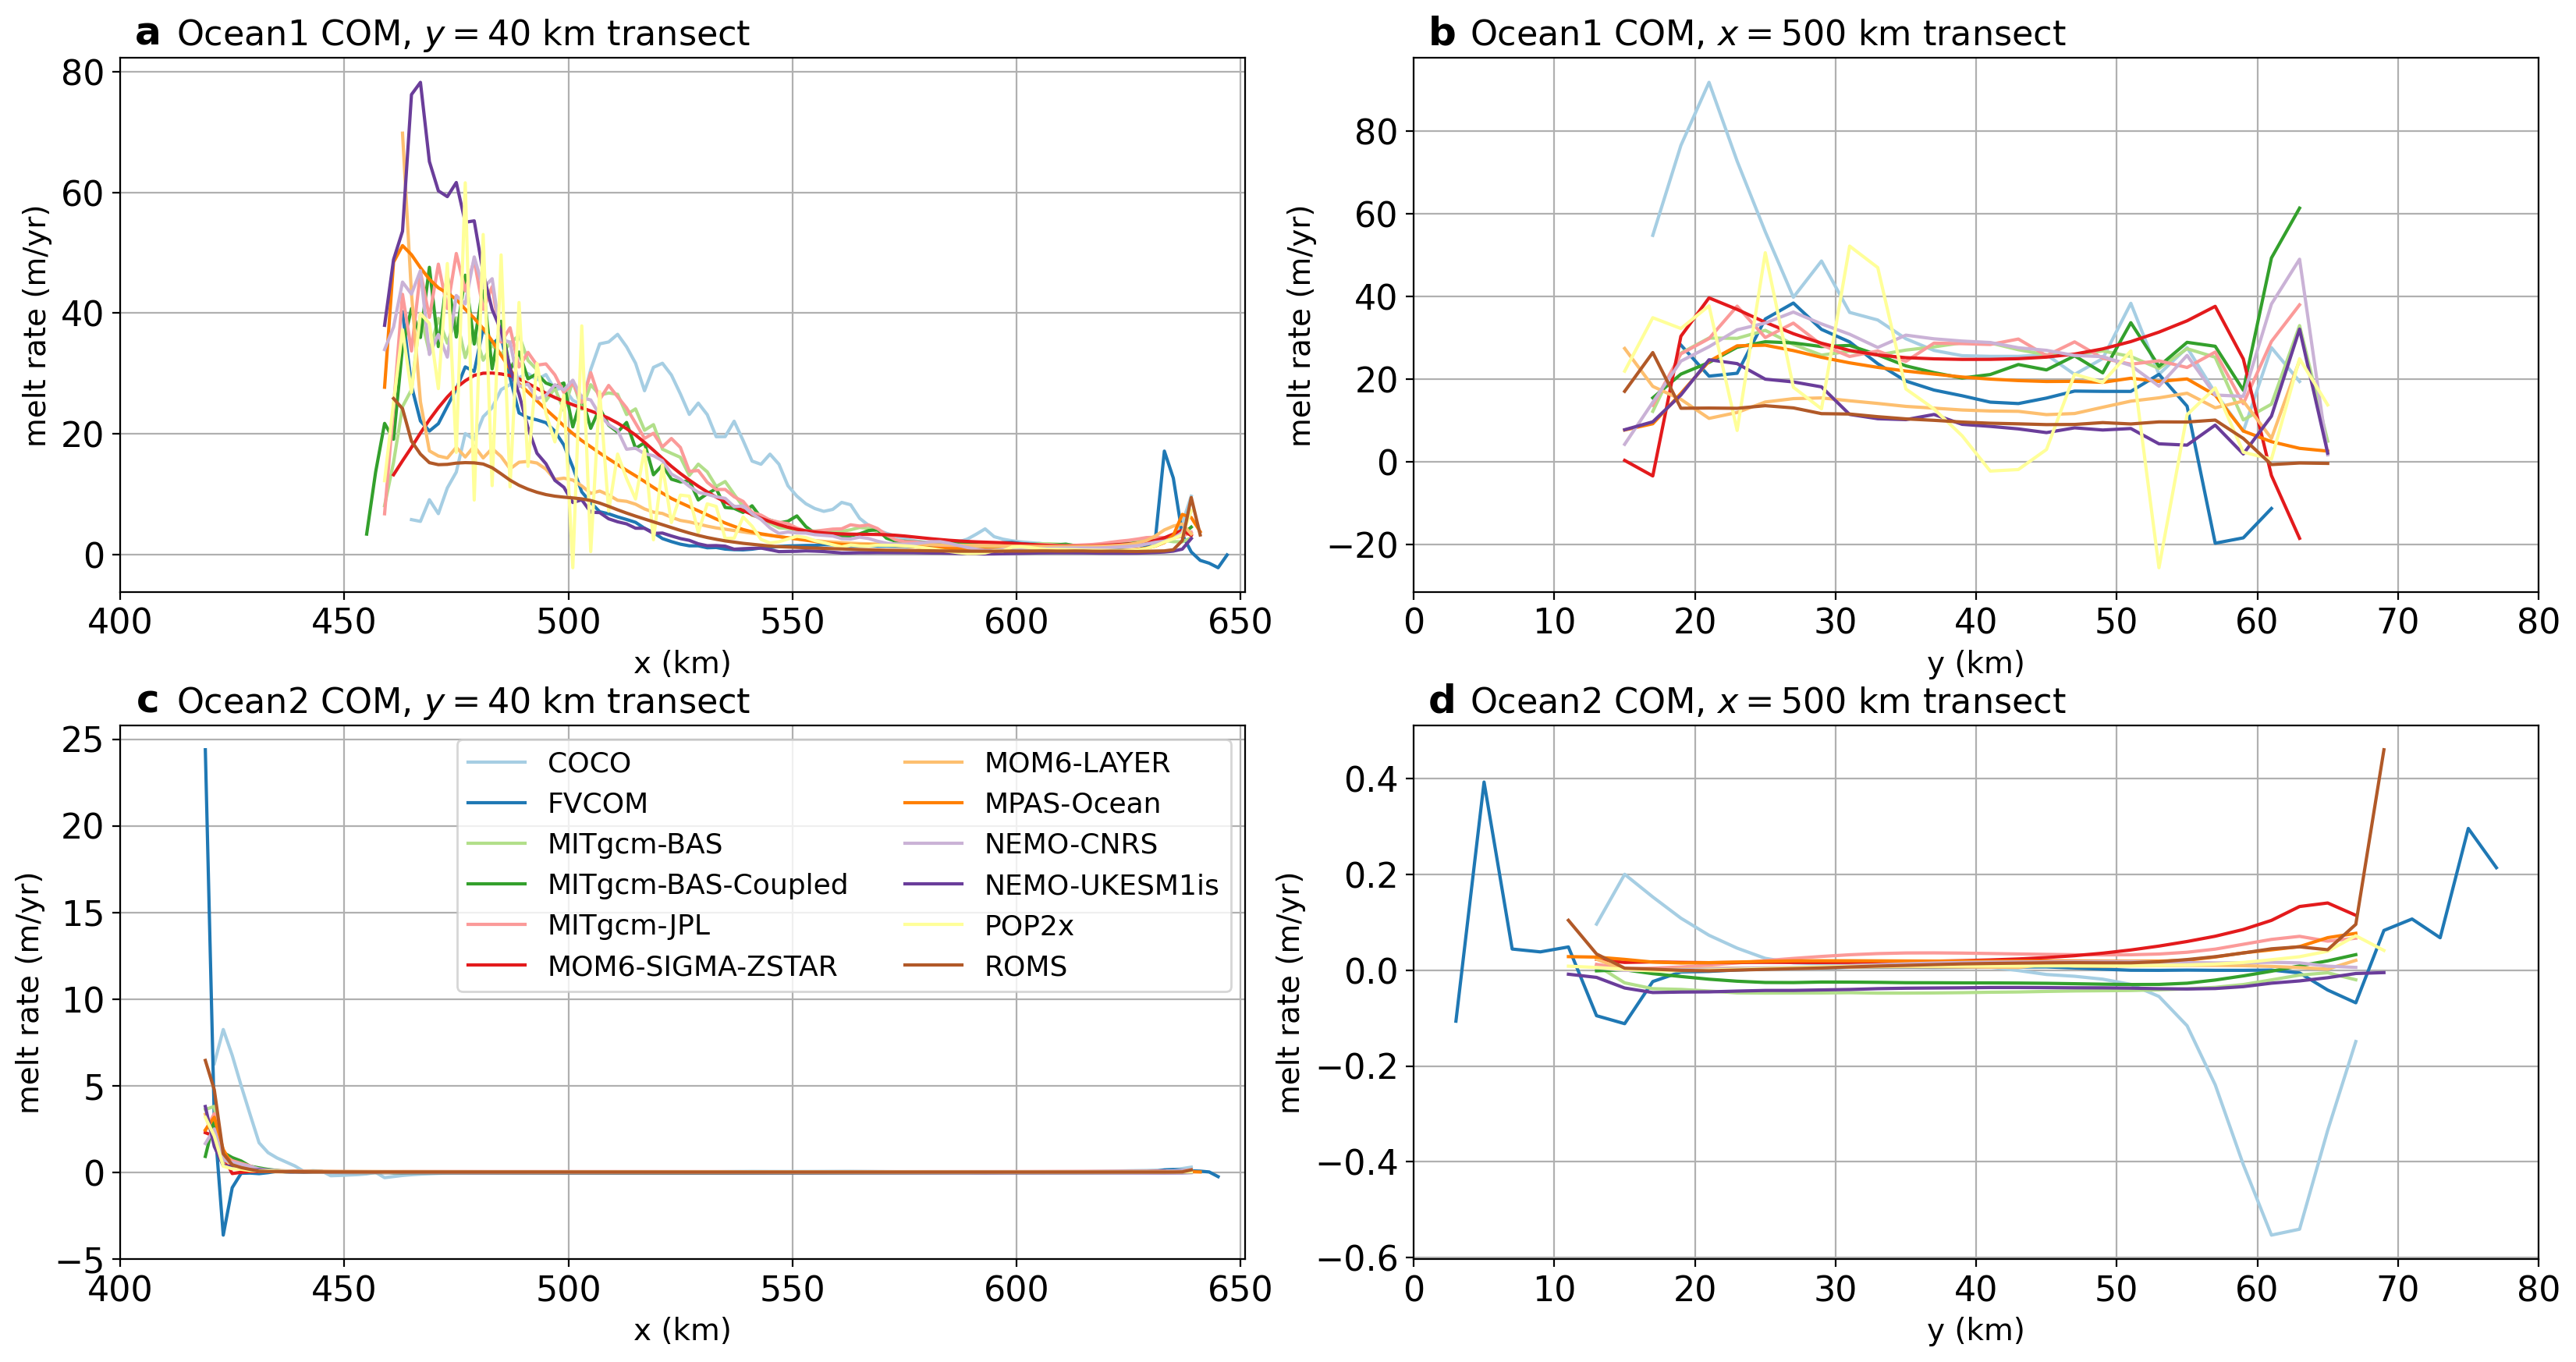

In [19]:
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
fig = plt.figure(figsize = (20,10),facecolor='w',dpi = 200)


for k in np.arange(4):
    expt = [Ocean1_COM,Ocean1_COM,Ocean2_COM,Ocean2_COM][k]
    ax = plt.subplot(2,2,k+1)
    
    title = ['Ocean1 COM, $y = 40$ km transect ',
             'Ocean1 COM, $x = 500$ km transect','Ocean2 COM, $y = 40$ km transect ',
             'Ocean2 COM, $x = 500$ km transect'][k]
    labels = get_labels(expt)
    length = len(expt)
        
    for i in np.arange(length):
        ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
        # make x and y coordinates
        ds = ds.set_coords(['x', 'y', 'time'])
        nTime = ds.sizes['nTime']
        mr = ds.meltRate.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
        # mr < 1e36 is to get rid of fill values.
        mr = sPerYr * mr.where(mr < 1e36).where(mr !=0)
        time = ds.time
        if (k==0 or k==2):
            plt.plot(1e-3 * ds.x.values,mr.isel(ny = 20).values,
                     color = modelcolours[i], label = labels[i])
        else: # plot TYP colours
            plt.plot(1e-3 * ds.y.values,mr.isel(nx = 90).values,
                     color = modelcolours[i], label = labels[i])
    
    
    plt.ylabel('melt rate (m/yr)', fontsize = 14)

    if (k==0 or k==2):
        plt.xlabel('x (km)', fontsize = 14)
        plt.xlim(400,651)
    else:
        plt.xlabel('y (km)', fontsize = 14)
        plt.xlim(0,80)
        
    # plt.xlim(-0.5,20)
    plt.text(0.025,1.045,['a','b','c','d'][k],horizontalalignment='center', fontweight='bold',
     verticalalignment='center',transform=ax.transAxes, fontsize = 18)
    plt.tick_params(labelsize=16)

    # # add 30m line for Ocean1
    # if k==0:
    #     plt.hlines([30],-0.5,20,color ='k', linestyle = 'dotted',linewidth = 3,label = '30m/yr')

    # if (k==0 or k==1):
    #     plt.ylim(-1,35.5)
    # else:
    #     plt.ylim(0.3,400)
    #     plt.yscale('log')
    #     plt.legend(ncols = 2, fontsize = 13)

    if k==2:
        plt.legend(ncols = 2, fontsize = 13)
    plt.grid()
    plt.title(title, fontsize=16,ha='left', x=0.05);

fig.subplots_adjust(hspace = 0.25, wspace = 0.15)



### *Note not really the right x and y since grid is for odd integer km....

Is it better to average 39 and 41 or say I am showing 41km and 501km which seem like very random numbers

### 